# Student Performance in Maths

# Regression Task

In [1]:
# import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data

mat = pd.read_csv('data\student-mat.csv', sep = ';')
mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
mat.shape

(395, 33)

The dataset contains 395 rows and 33 columns

In [4]:
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
mat.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

There are no missing values.

In [7]:
mat.duplicated().sum()

0

There are no duplicates in the data

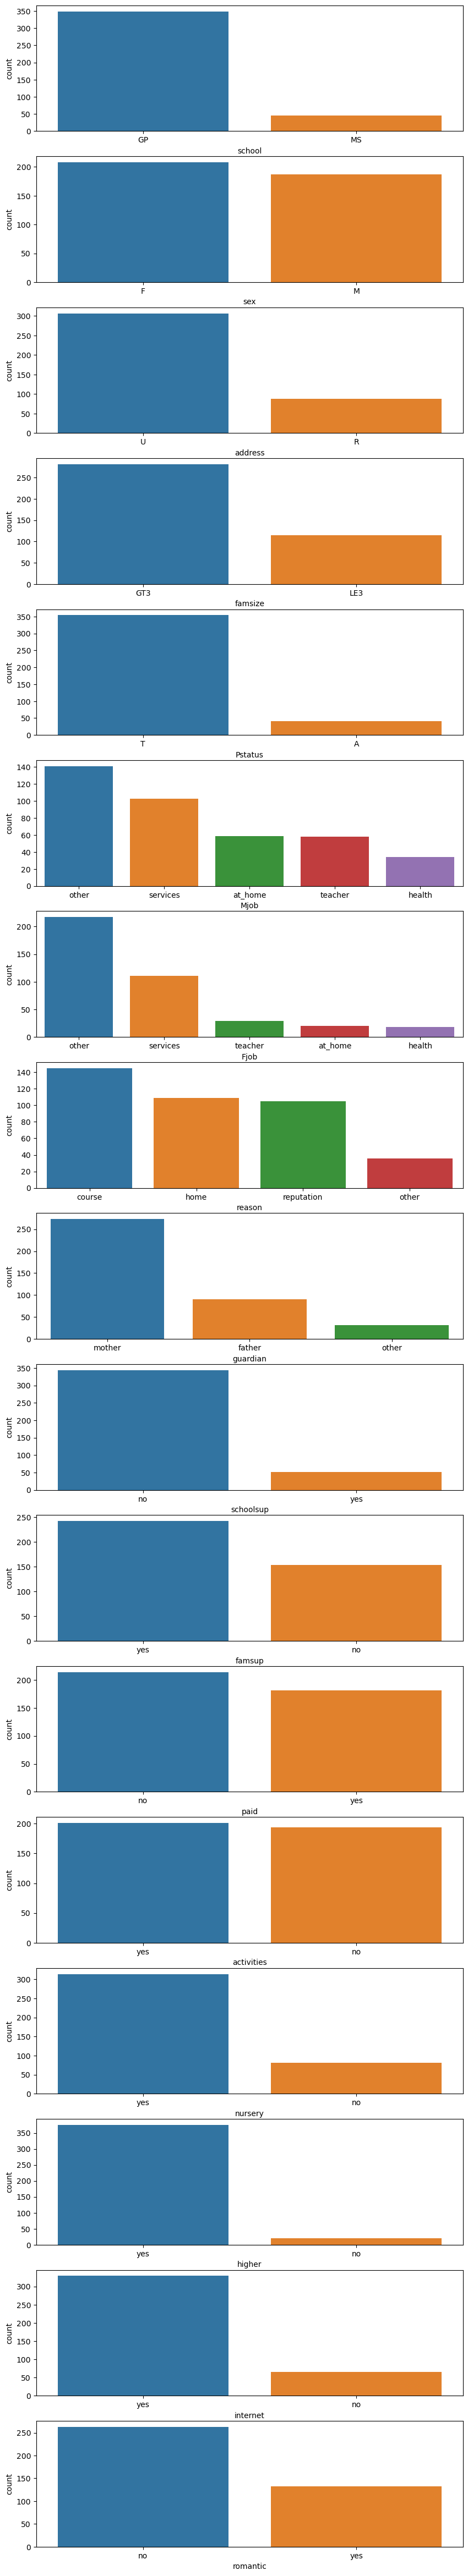

In [8]:
# distribution of categorical features

cat_attributes = mat.select_dtypes(object).columns.to_list()
x = 0
fig, ax = plt.subplots(17, figsize=(10,60))
for attribute in cat_attributes:
    sns.barplot(mat, x = mat[attribute].value_counts().index, y = mat[attribute].value_counts(), ax = ax[x])
    x+=1
plt.show()

Majority of students attend Gabriel Pereira and live in urban areas.They have a family size greater than 3 where both parents live together. Most parents are employed in the 'other' category and majority of students do not receive extra educational support.

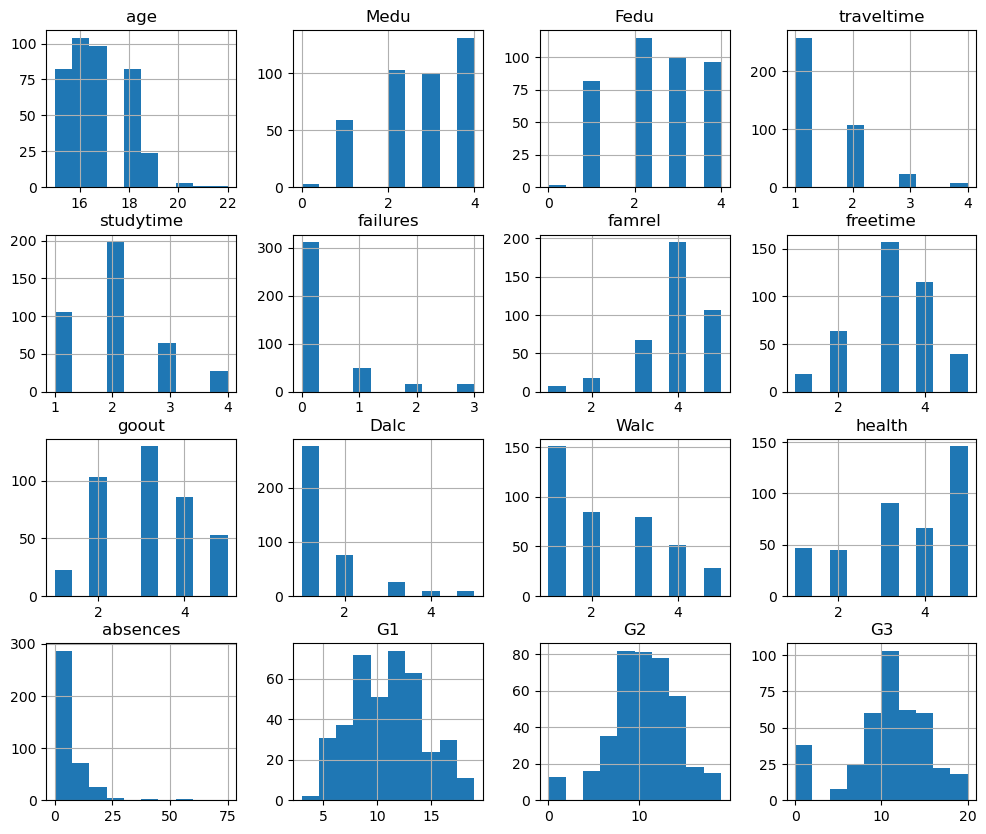

In [9]:
# distribution of numerical features

mat.hist(figsize =(12,10));

Most of the students fall within the age range of 16 to 19 and were never absent from school.

## Explore the Data

In [10]:
# score by school 

mat[['school', 'G3']].groupby('school', as_index=False).mean()

,school,G3
0,GP,10.489971
1,MS,9.847826


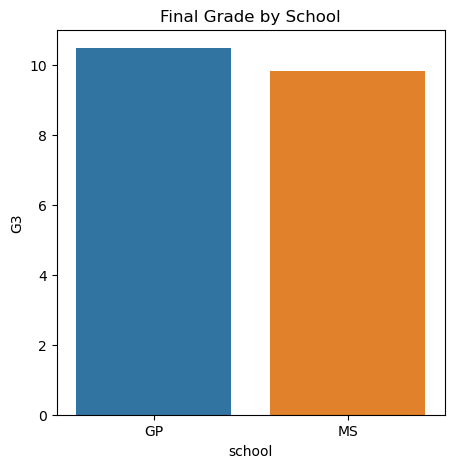

In [11]:
# plot of final grade by school

plt.figure(figsize=(5,5))

sns.barplot(x = 'school', y = 'G3', errorbar=None, data = mat)
plt.title('Final Grade by School');

Students in Gabriel Pereira score slightly better than students in Mousinho da Silveira on averge.

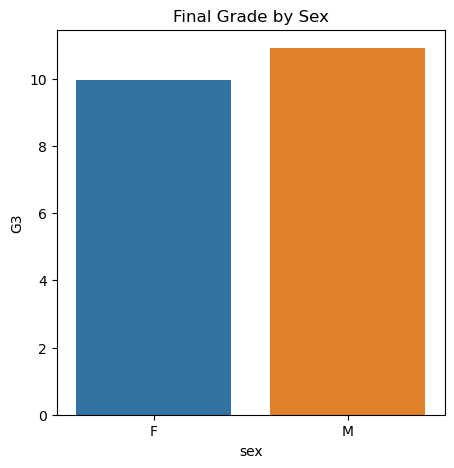

In [12]:
# plot of final grade by sex

plt.figure(figsize=(5,5))

sns.barplot(x = 'sex', y = 'G3', errorbar=None, data = mat)
plt.title('Final Grade by Sex');

Male students perform slightly better at maths than female students.

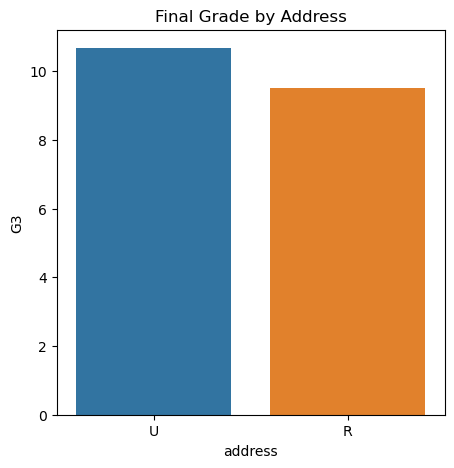

In [13]:
# plot of final grade by address

plt.figure(figsize=(5,5))

sns.barplot(x = 'address', y = 'G3', errorbar=None, data = mat)
plt.title('Final Grade by Address');

Urban students seem to do perform slightly better at maths than rural students

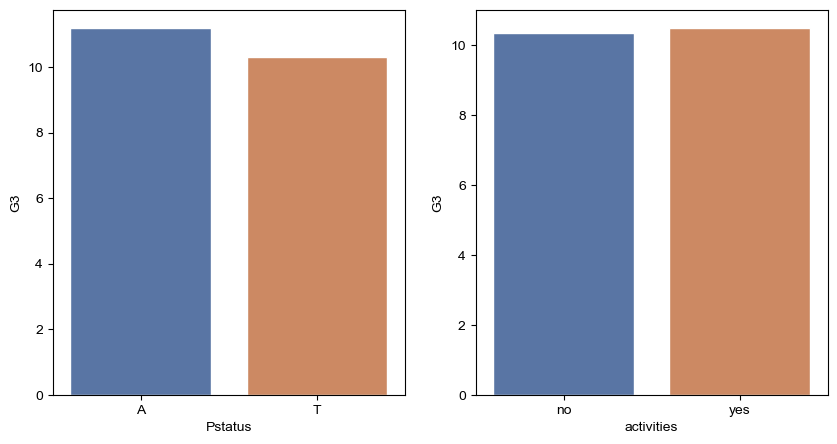

In [14]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.set()
sns.barplot(x = 'Pstatus', y = 'G3', errorbar=None, data = mat, ax = ax[0])
sns.barplot(x = 'activities', y = 'G3', errorbar=None, data = mat, ax = ax[1]);

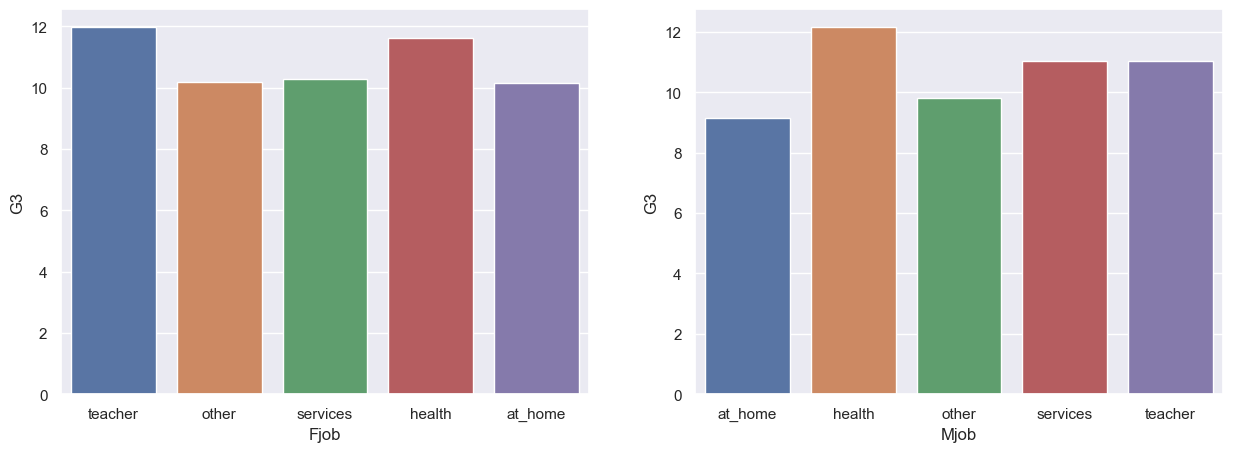

In [15]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

sns.set()
sns.barplot(x = 'Fjob', y = 'G3', errorbar=None, data = mat, ax = ax[0])
sns.barplot(x = 'Mjob', y = 'G3', errorbar=None, data = mat, ax = ax[1]);

Students whose fathers work as teachers and mothers work in the health sector seem to perform better at maths

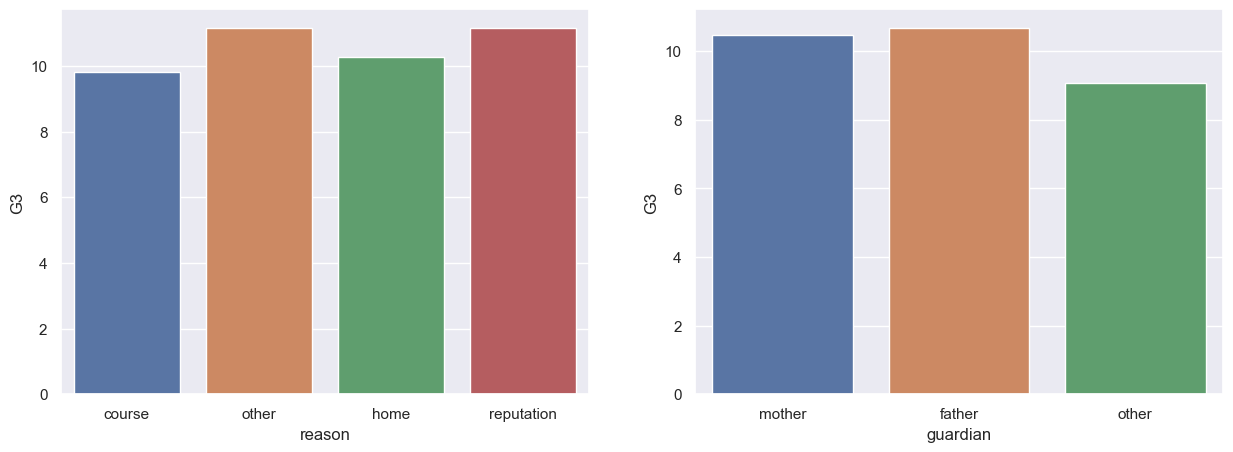

In [16]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

sns.set()
sns.barplot(x = 'reason', y = 'G3', errorbar=None, data = mat, ax = ax[0])
sns.barplot(x = 'guardian', y = 'G3', errorbar=None, data = mat, ax = ax[1]);

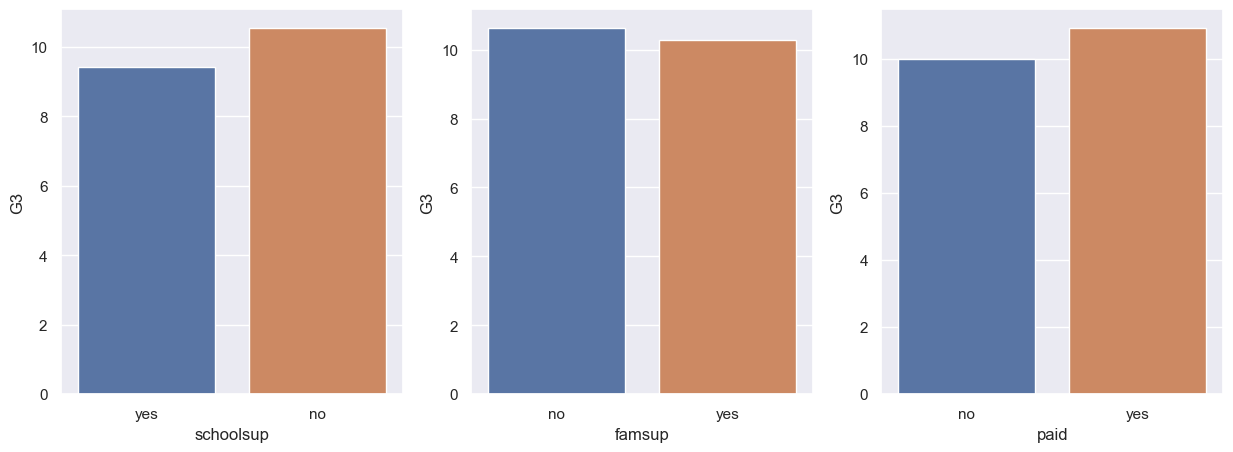

In [17]:
fig, ax = plt.subplots(1,3, figsize = (15,5))

sns.set()
sns.barplot(x = 'schoolsup', y = 'G3', errorbar=None, data = mat, ax = ax[0])
sns.barplot(x = 'famsup', y = 'G3', errorbar=None, data = mat, ax = ax[1])
sns.barplot(x = 'paid', y = 'G3', errorbar=None, data = mat, ax = ax[2]);

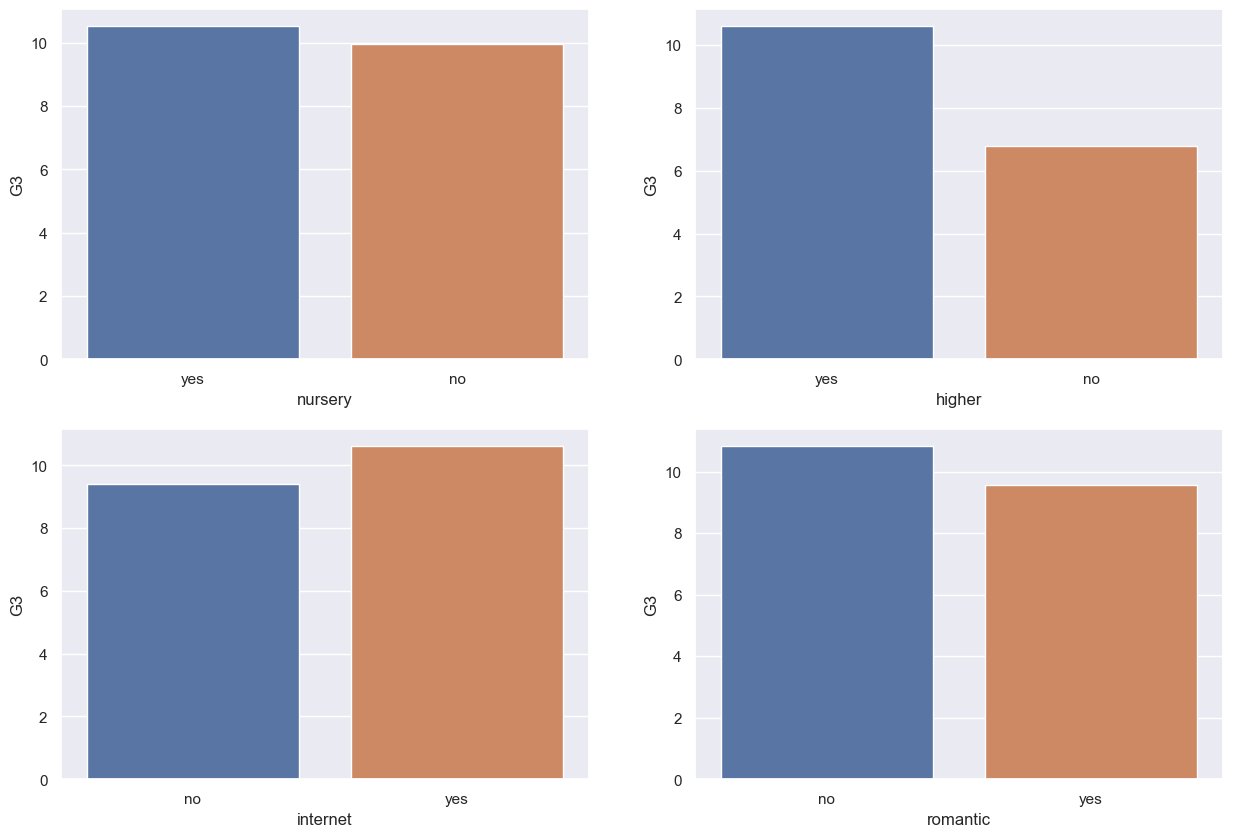

In [18]:
fig, ax = plt.subplots(2,2, figsize = (15,10))

sns.set()
sns.barplot(x = 'nursery', y = 'G3', errorbar=None, data = mat, ax = ax[0][0])
sns.barplot(x = 'higher', y = 'G3', errorbar=None, data = mat, ax = ax[0][1])
sns.barplot(x = 'internet', y = 'G3', errorbar=None, data = mat, ax = ax[1][0])
sns.barplot(x = 'romantic', y = 'G3', errorbar=None, data = mat, ax = ax[1][1]);

Students who intend to continue their education at the higher level significantly perform better at maths than their peers who do not wish to further their education.

In [19]:
# look for correlation

corr_matrix = abs(mat.corr(numeric_only = True))
corr_matrix['G3'].sort_values(ascending = False)

G3            1.000000
G2            0.904868
G1            0.801468
failures      0.360415
Medu          0.217147
age           0.161579
Fedu          0.152457
goout         0.132791
traveltime    0.117142
studytime     0.097820
health        0.061335
Dalc          0.054660
Walc          0.051939
famrel        0.051363
absences      0.034247
freetime      0.011307
Name: G3, dtype: float64

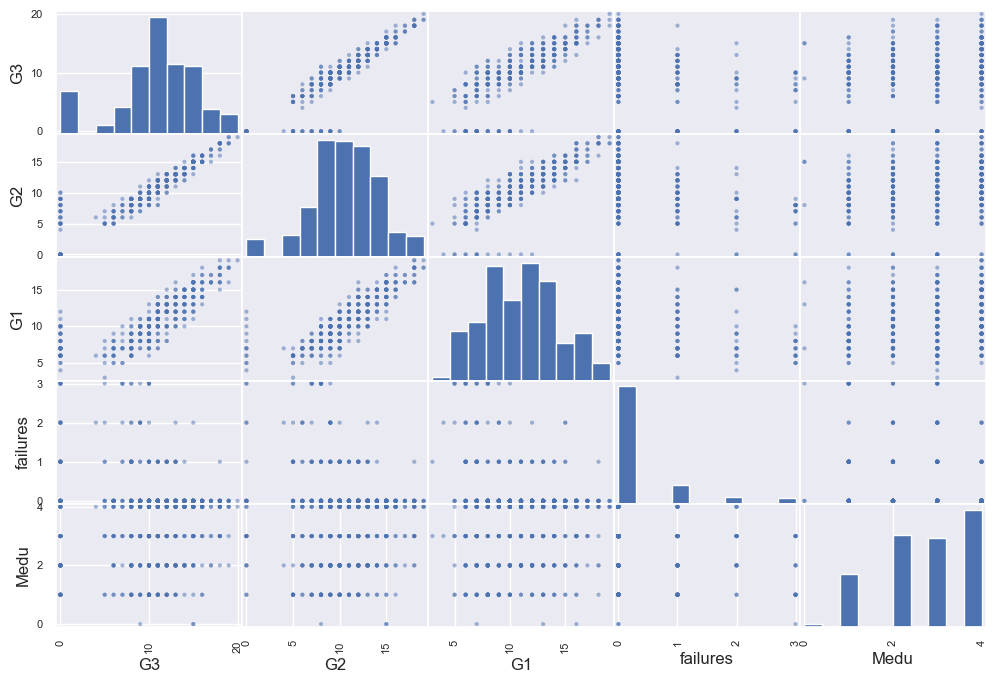

In [20]:
attributes = ['G3', 'G2', 'G1', 'failures', 'Medu']
scatter_matrix(mat[attributes], figsize = (12,8))
plt.show();

The 1st period, 2nd period and 3rd final grades are all have a strong positive correlation with each other. Students who perform well in any of these evaluations are likely to perform well in the others as well.

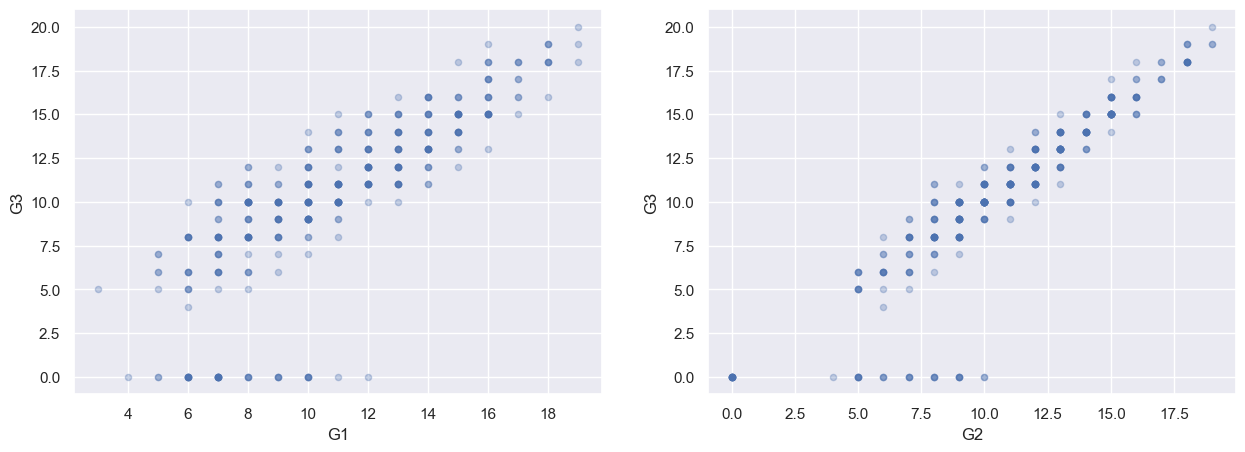

In [21]:
# take a closer look at G1 and G2 scatterplots

fig, axes = plt.subplots(1,2, figsize = (15,5))

mat.plot(kind='scatter',x = 'G1', y ='G3', alpha = 0.3, grid = True, ax = axes[0])
mat.plot(kind='scatter',x = 'G2', y ='G3', alpha = 0.3, grid = True, ax = axes[1])
plt.show();

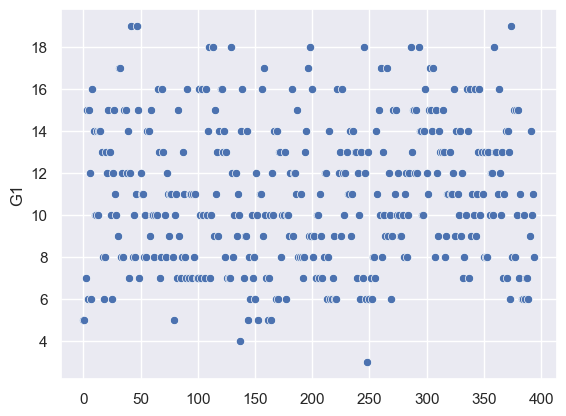

In [22]:
sns.scatterplot(mat['G1']);

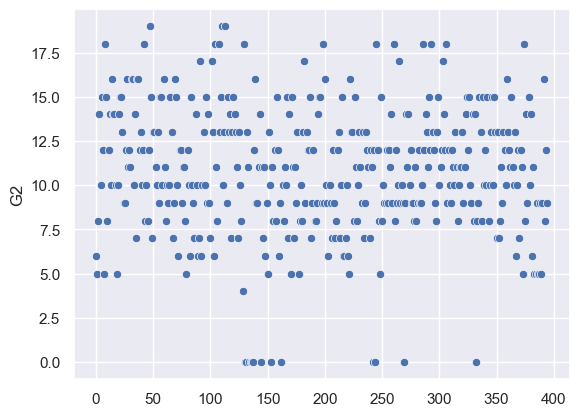

In [23]:
sns.scatterplot(mat['G2']);

# Prepare data for ML Algorithm

## Split the data

In [24]:
# split the data into train and test sets

train, test = train_test_split( mat, test_size=0.2, shuffle = True, random_state=42)

In [25]:
train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
181,GP,M,16,U,GT3,T,3,3,services,other,...,4,2,3,1,2,3,2,12,13,12
194,GP,M,16,U,GT3,T,2,3,other,other,...,5,3,3,1,1,3,0,13,14,14
173,GP,F,16,U,GT3,T,1,3,at_home,services,...,4,3,5,1,1,3,0,8,7,0
63,GP,F,16,U,GT3,T,4,3,teacher,health,...,3,4,4,2,4,4,2,10,9,9
253,GP,M,16,R,GT3,T,2,1,other,other,...,3,3,2,1,3,3,0,8,9,8


In [26]:
train.shape, test.shape

((316, 33), (79, 33))

## Clean the Data

In [27]:
x_train = train.drop('G3', axis = 1)
y_train = train.G3.copy()

In [28]:
x_train.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
dtype: int64

In [29]:
cat_attributes = x_train.select_dtypes('object').columns.tolist()
cat_attributes

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [30]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316 entries, 181 to 102
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      316 non-null    object
 1   sex         316 non-null    object
 2   age         316 non-null    int64 
 3   address     316 non-null    object
 4   famsize     316 non-null    object
 5   Pstatus     316 non-null    object
 6   Medu        316 non-null    int64 
 7   Fedu        316 non-null    int64 
 8   Mjob        316 non-null    object
 9   Fjob        316 non-null    object
 10  reason      316 non-null    object
 11  guardian    316 non-null    object
 12  traveltime  316 non-null    int64 
 13  studytime   316 non-null    int64 
 14  failures    316 non-null    int64 
 15  schoolsup   316 non-null    object
 16  famsup      316 non-null    object
 17  paid        316 non-null    object
 18  activities  316 non-null    object
 19  nursery     316 non-null    object
 20  higher      3

In [31]:
num_attr_scale = ['age', 'absences', 'G1', 'G2']

scaler = StandardScaler()

## Building Transformation Pipelines

In [37]:
import sklearn
sklearn.set_config(display = 'diagram')

In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

num_pipeline = make_pipeline(SimpleImputer(strategy = 'median'), StandardScaler())
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [39]:
likert_cat_attr = [attr for attr in x_train.select_dtypes('number').columns if attr  not in num_attr_scale]
likert_cat_attr

['Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health']

In [40]:
cat_attributes_imp = [attr for attr in x_train.columns if attr  not in num_attr_scale]

In [41]:
print(f'Categorical features for One-hot encoding: {len(cat_attributes)}\n {cat_attributes}\n Numerical features for scaling: {len(num_attr_scale)}\n {num_attr_scale}\n Categorical Likert features for Simple Imputer: {len(likert_cat_attr)}\n {likert_cat_attr}')

Categorical features for One-hot encoding: 17
 ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
 Numerical features for scaling: 4
 ['age', 'absences', 'G1', 'G2']
 Categorical Likert features for Simple Imputer: 11
 ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']


In [42]:
cat_im_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'))
cat_1h_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))

In [43]:
from sklearn.compose import make_column_transformer

preprocessing = make_column_transformer((num_pipeline, num_attr_scale),
                                        (cat_im_pipeline, likert_cat_attr),
                                        (cat_1h_pipeline, cat_attributes)
                                        )

In [44]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316 entries, 181 to 102
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      316 non-null    object
 1   sex         316 non-null    object
 2   age         316 non-null    int64 
 3   address     316 non-null    object
 4   famsize     316 non-null    object
 5   Pstatus     316 non-null    object
 6   Medu        316 non-null    int64 
 7   Fedu        316 non-null    int64 
 8   Mjob        316 non-null    object
 9   Fjob        316 non-null    object
 10  reason      316 non-null    object
 11  guardian    316 non-null    object
 12  traveltime  316 non-null    int64 
 13  studytime   316 non-null    int64 
 14  failures    316 non-null    int64 
 15  schoolsup   316 non-null    object
 16  famsup      316 non-null    object
 17  paid        316 non-null    object
 18  activities  316 non-null    object
 19  nursery     316 non-null    object
 20  higher      3

In [45]:
math_prepared = preprocessing.fit_transform(x_train)

In [46]:
math_prepared.shape

(316, 58)

In [47]:
preprocessing.get_feature_names_out()

array(['pipeline-1__age', 'pipeline-1__absences', 'pipeline-1__G1',
       'pipeline-1__G2', 'pipeline-2__Medu', 'pipeline-2__Fedu',
       'pipeline-2__traveltime', 'pipeline-2__studytime',
       'pipeline-2__failures', 'pipeline-2__famrel',
       'pipeline-2__freetime', 'pipeline-2__goout', 'pipeline-2__Dalc',
       'pipeline-2__Walc', 'pipeline-2__health', 'pipeline-3__school_GP',
       'pipeline-3__school_MS', 'pipeline-3__sex_F', 'pipeline-3__sex_M',
       'pipeline-3__address_R', 'pipeline-3__address_U',
       'pipeline-3__famsize_GT3', 'pipeline-3__famsize_LE3',
       'pipeline-3__Pstatus_A', 'pipeline-3__Pstatus_T',
       'pipeline-3__Mjob_at_home', 'pipeline-3__Mjob_health',
       'pipeline-3__Mjob_other', 'pipeline-3__Mjob_services',
       'pipeline-3__Mjob_teacher', 'pipeline-3__Fjob_at_home',
       'pipeline-3__Fjob_health', 'pipeline-3__Fjob_other',
       'pipeline-3__Fjob_services', 'pipeline-3__Fjob_teacher',
       'pipeline-3__reason_course', 'pipeline-3__r

In [48]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import Pipeline

forest_reg = Pipeline([
 ("preprocessing", preprocessing),
 ("randomforestregressor", RandomForestRegressor(random_state=42)),])
forest_reg.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'absences', 'G1',
                                                   'G2']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Medu', 'Fedu', 'traveltime',
                                                   'studytime', 'failu...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Mjob',
                                                   'Fjob', 'reason', 'guardian',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [49]:
predictions = forest_reg.predict(x_train)
from sklearn.metrics import mean_squared_error

forest_rmse = mean_squared_error(y_train, predictions, squared = False)

forest_rmse

0.5781422123677867

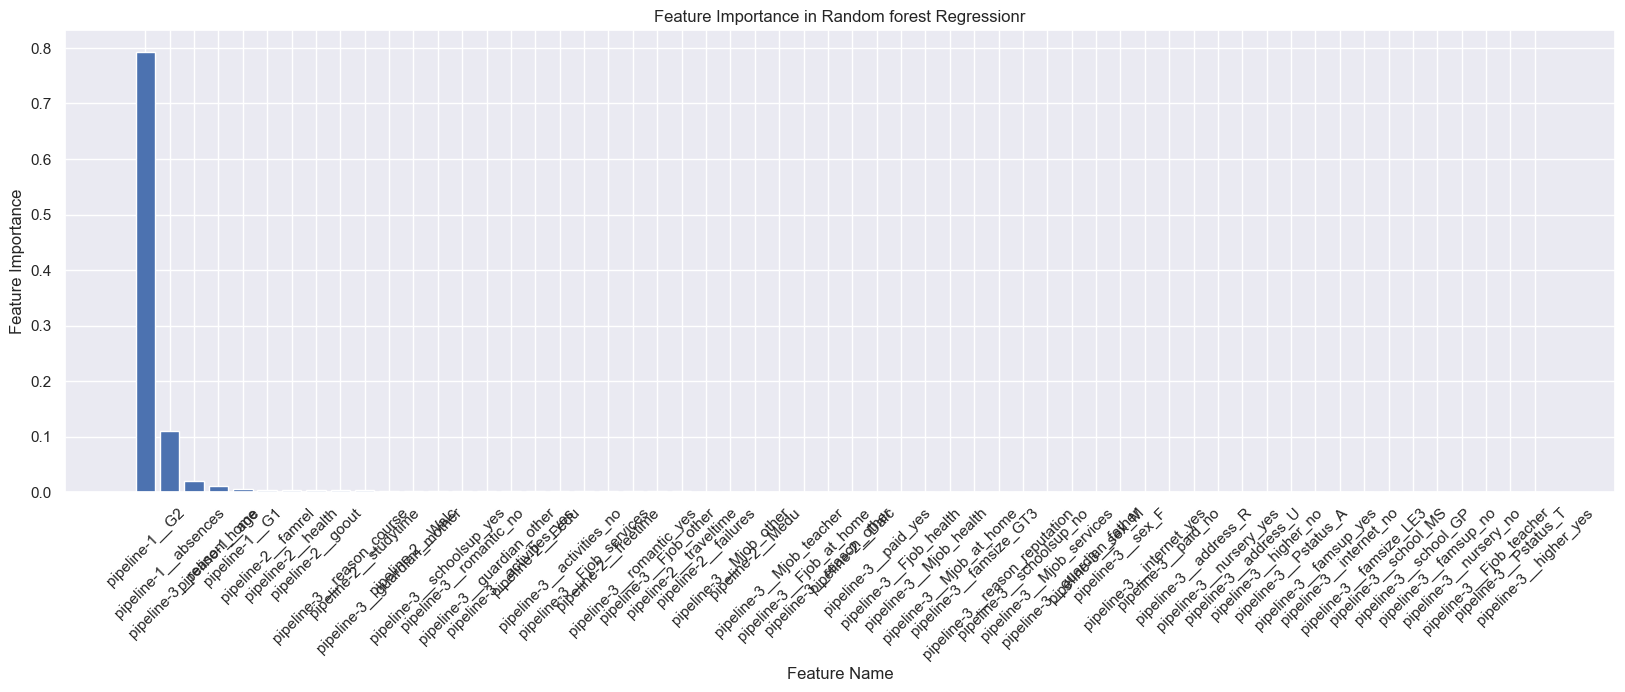

In [51]:
feature_importances = forest_reg.named_steps['randomforestregressor'].feature_importances_

plt.figure(figsize=(20,6))
# Sort features by importance
sorted_features = sorted(zip(feature_importances, forest_reg['preprocessing'].get_feature_names_out()), reverse = True)

# Extract feature names and importance values
feature_names = [x[1] for x in sorted_features]
importance_values = [x[0] for x in sorted_features]

# Create a bar chart to visualize feature importance
plt.bar(feature_names, importance_values)
plt.xticks(rotation = 45)
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Random forest Regressionr')
plt.show();

In [52]:
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline

forest_reg = Pipeline([
 ("preprocessing", preprocessing),
 ("randomforestregressor", RandomForestRegressor(random_state=42)),])

forest_rmses = -cross_val_score(forest_reg, x_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 10)

In [53]:
pd.Series(forest_rmses).describe()

count    10.000000
mean      1.358934
std       0.296818
min       1.085351
25%       1.200340
50%       1.233577
75%       1.438225
max       2.034159
dtype: float64

In [54]:
full_pipeline = Pipeline([
 ("preprocessing", preprocessing),
 ("random_forest", RandomForestRegressor(random_state=42)),])

In [55]:
# Get an optimized model using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {'random_forest__max_features': randint(low =2, high = 55)}
    
rnd_search = RandomizedSearchCV(full_pipeline, param_distributions = param_distribs, n_iter = 10, cv = 5, scoring = 'neg_root_mean_squared_error', random_state = 42)

rnd_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'absences',
                                                                                'G1',
                                                                                'G2']),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='most_frequent'))]),
                                                                               ['Medu',
                                                                                'Fed...
                                                                                'reason',
                                                                                'guardian',
                                                                                'schoolsup',
                                                                                'famsup',
                                                                                'paid',
                                                                                'activities',
                                                                                'nursery',
                                                                                'higher',
                                                                                'internet',
                                                                                'romantic'])])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001766F59A750>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [56]:
final_model = rnd_search.best_estimator_
feature_importances = final_model['random_forest'].feature_importances_

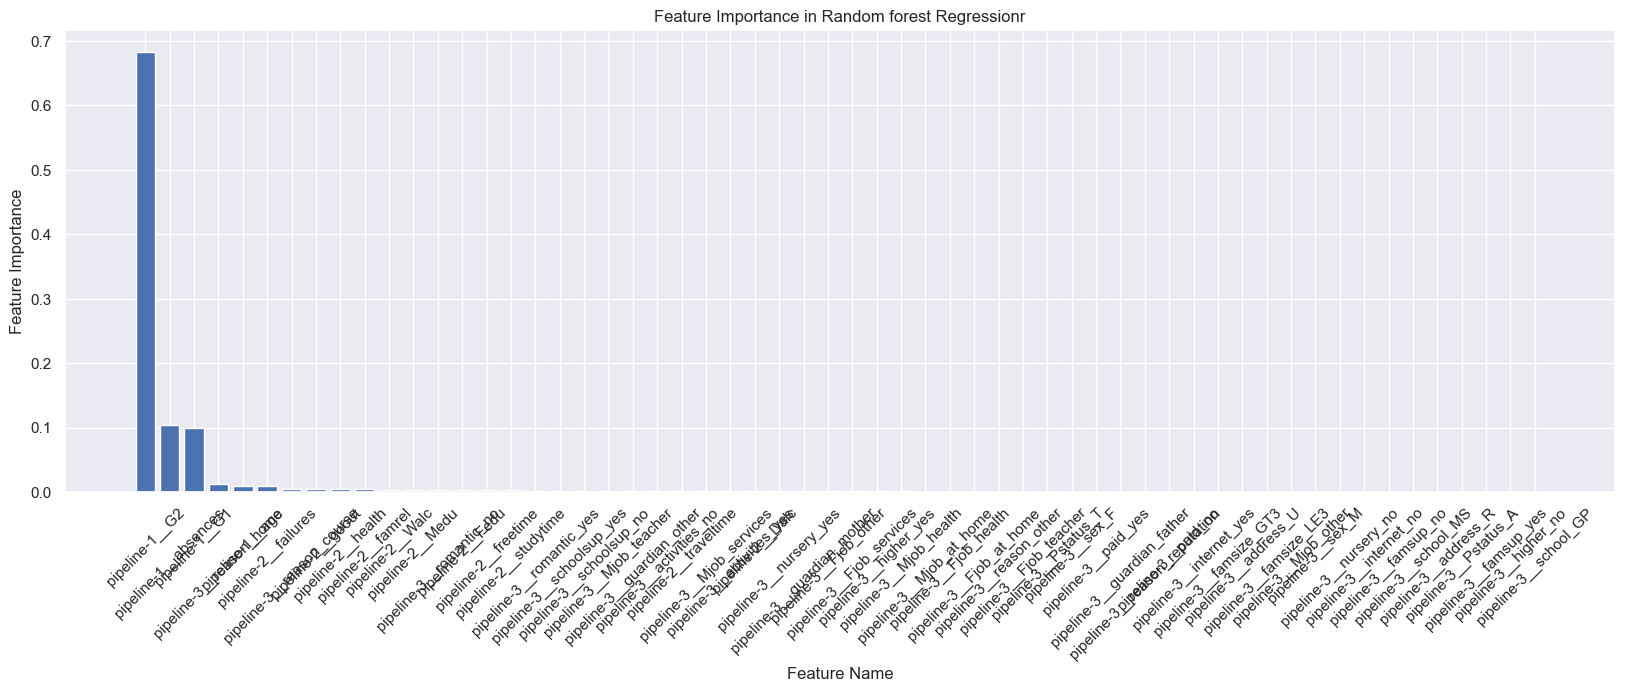

In [58]:
plt.figure(figsize=(20,6))
# Sort features by importance
sorted_features = sorted(zip(feature_importances, final_model['preprocessing'].get_feature_names_out()), reverse = True)

# Extract feature names and importance values
feature_names = [x[1] for x in sorted_features]
importance_values = [x[0] for x in sorted_features]

# Create a bar chart to visualize feature importance
plt.bar(feature_names, importance_values)
plt.xticks(rotation = 45)
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Random forest Regressionr')
plt.show();

In [59]:
predictions = final_model.predict(x_train)

forest_rmse = mean_squared_error(y_train, predictions, squared = False)

forest_rmse

0.5828164376542584

In [60]:
forest_rmses = -cross_val_score(final_model, x_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 10)

In [61]:
pd.Series(forest_rmses).describe()

count    10.000000
mean      1.370848
std       0.345011
min       1.082187
25%       1.129715
50%       1.266527
75%       1.455486
max       2.189391
dtype: float64

## Feature Selection

In [62]:
top_features = [feature for importance, feature in sorted_features if importance > 0.005]
top_features

['pipeline-1__G2',
 'pipeline-1__absences',
 'pipeline-1__G1',
 'pipeline-3__reason_home',
 'pipeline-1__age',
 'pipeline-2__failures',
 'pipeline-3__reason_course',
 'pipeline-2__goout',
 'pipeline-2__health']

## Run model on test set

In [63]:
x_test = test.drop('G3', axis = 1)
y_test = test.G3.copy()

In [64]:
forest_rmses = -cross_val_score(final_model, x_test, y_test, scoring = 'neg_root_mean_squared_error', cv = 10)

pd.Series(forest_rmses).describe()

count    10.000000
mean      1.951235
std       0.860943
min       0.950098
25%       1.069450
50%       2.070364
75%       2.650974
max       3.122747
dtype: float64

# Student Performance in Portugese

In [65]:
# load the data

por = pd.read_csv('data\student-por.csv', sep = ';')
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [66]:
por.shape

(649, 33)

The dataset contains 649 rows and 33 columns

In [67]:
por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [68]:
por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [69]:
por.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

There are no missing values.

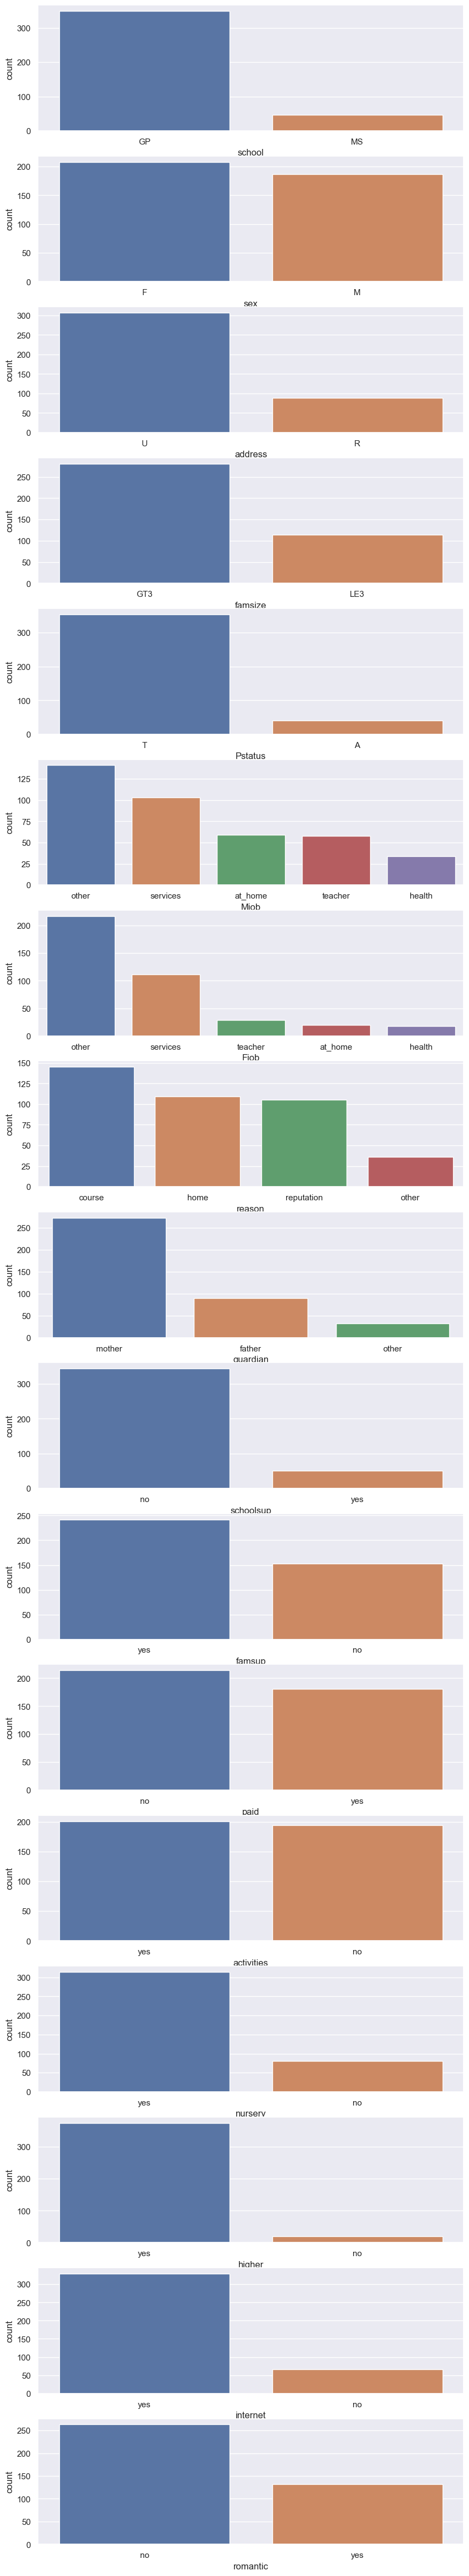

In [70]:
# distribution of categorical features

cat_attributes = por.select_dtypes(object).columns.to_list()
x = 0
fig, ax = plt.subplots(17, figsize=(10,60))
for attribute in cat_attributes:
    sns.barplot(mat, x = mat[attribute].value_counts().index, y = mat[attribute].value_counts(), ax = ax[x])
    x+=1
plt.show()

Majority of students attend Gabriel Pereira and live in urban areas.They have a family size greater than 3 where both parents live together. Most parents are employed in the 'other' category and majority of students do not receive extra educational support.

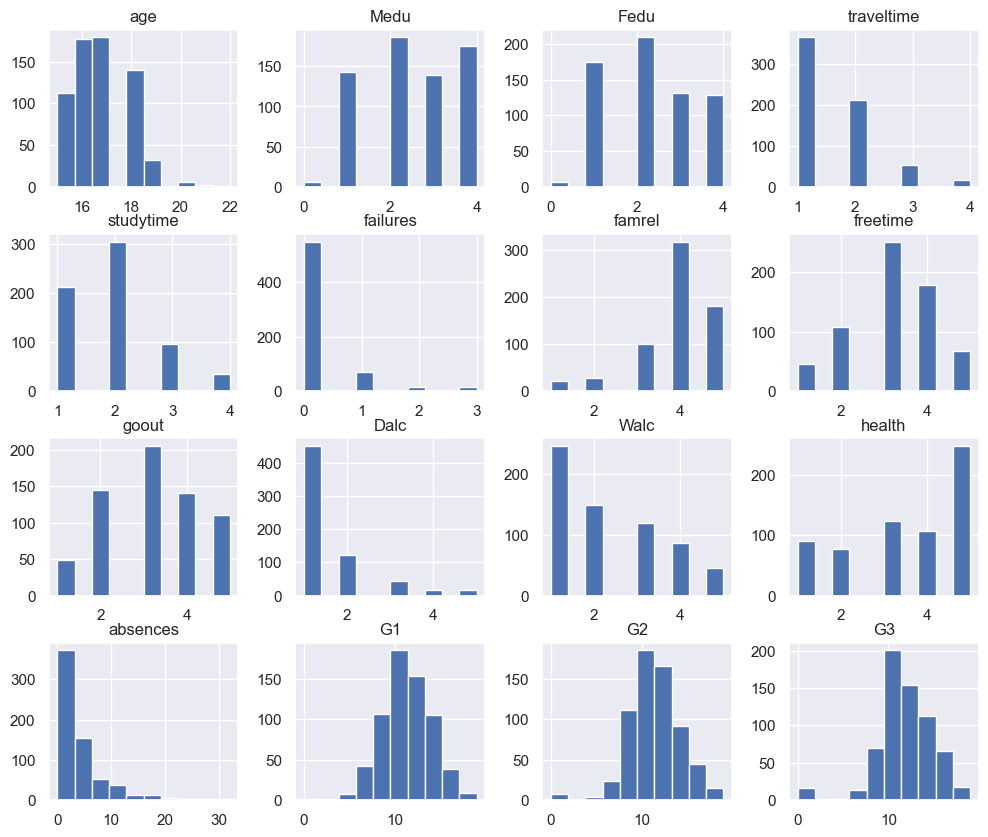

In [71]:
# distribution of numerical features

por.hist(figsize =(12,10));

Most of the students fall within the age range of 16 to 19 and were never absent from school.

## Explore the Data

In [72]:
# score by school 

por[['school', 'G3']].groupby('school', as_index=False).mean()

,school,G3
0,GP,12.576832
1,MS,10.650442


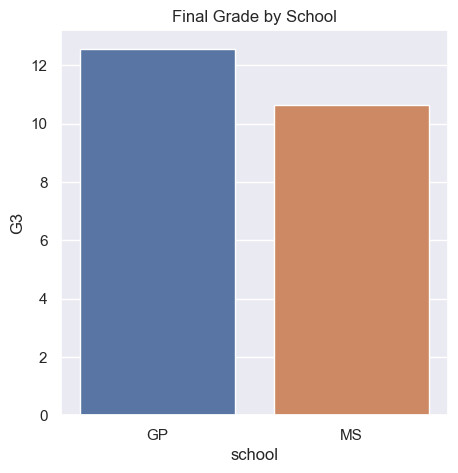

In [73]:
# plot of final grade by school

plt.figure(figsize=(5,5))

sns.barplot(x = 'school', y = 'G3', errorbar=None, data = por)
plt.title('Final Grade by School');

Students in Gabriel Pereira score slightly better than students in Mousinho da Silveira on averge.

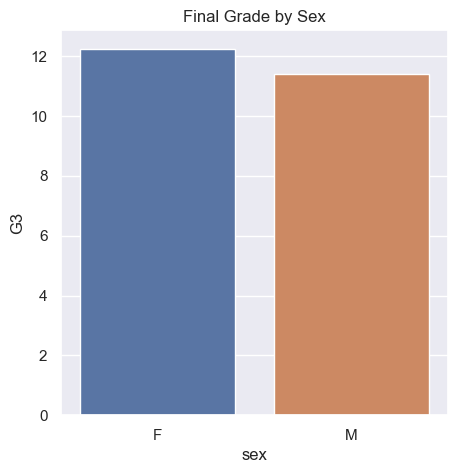

In [74]:
# plot of final grade by sex

plt.figure(figsize=(5,5))

sns.barplot(x = 'sex', y = 'G3', errorbar=None, data = por)
plt.title('Final Grade by Sex');

Female students perform slightly better at portugese than male students.

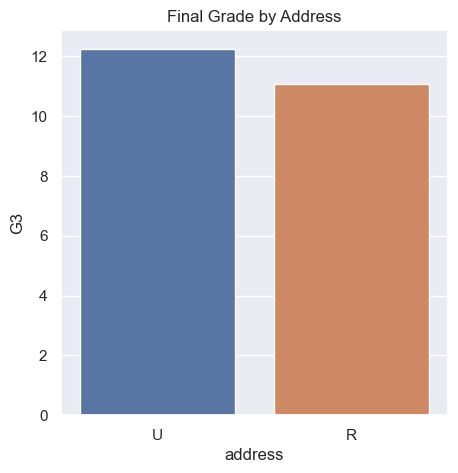

In [75]:
# plot of final grade by address

plt.figure(figsize=(5,5))

sns.barplot(x = 'address', y = 'G3', errorbar=None, data = por)
plt.title('Final Grade by Address');

Urban students seem to do perform slightly better at portugese than rural students

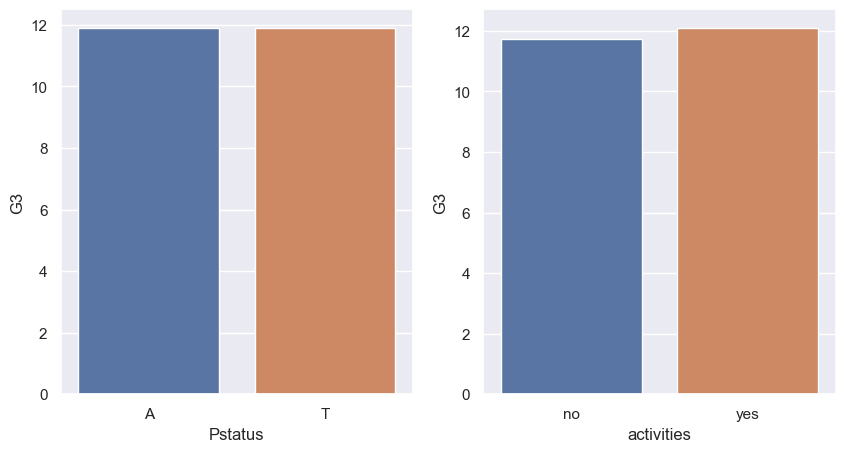

In [76]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.set()
sns.barplot(x = 'Pstatus', y = 'G3', errorbar=None, data = por, ax = ax[0])
sns.barplot(x = 'activities', y = 'G3', errorbar=None, data = por, ax = ax[1]);

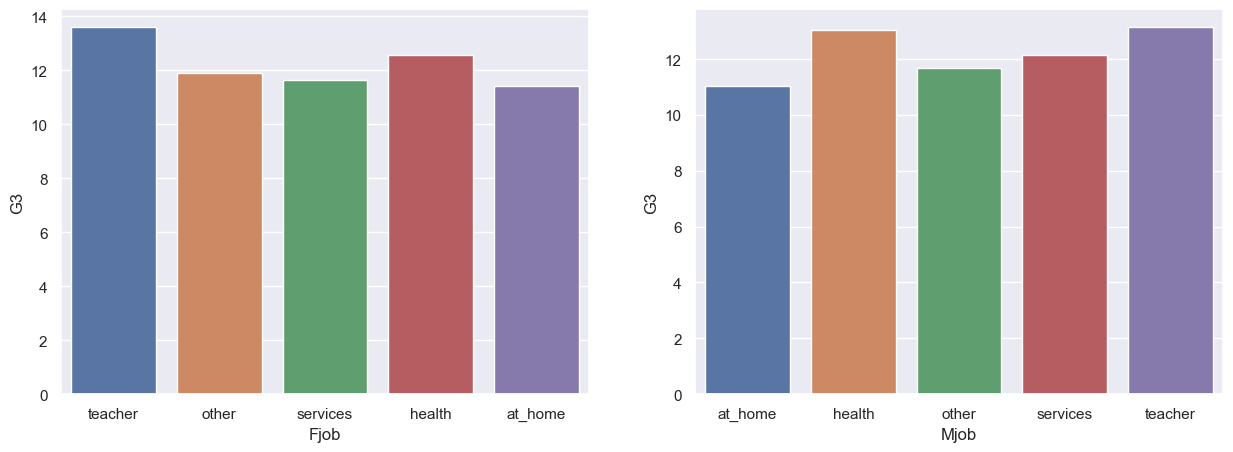

In [77]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

sns.set()
sns.barplot(x = 'Fjob', y = 'G3', errorbar=None, data = por, ax = ax[0])
sns.barplot(x = 'Mjob', y = 'G3', errorbar=None, data = por, ax = ax[1]);

Students whose fathers work as teachers and mothers work as teachers and in the health sector seem to perform better at portugese

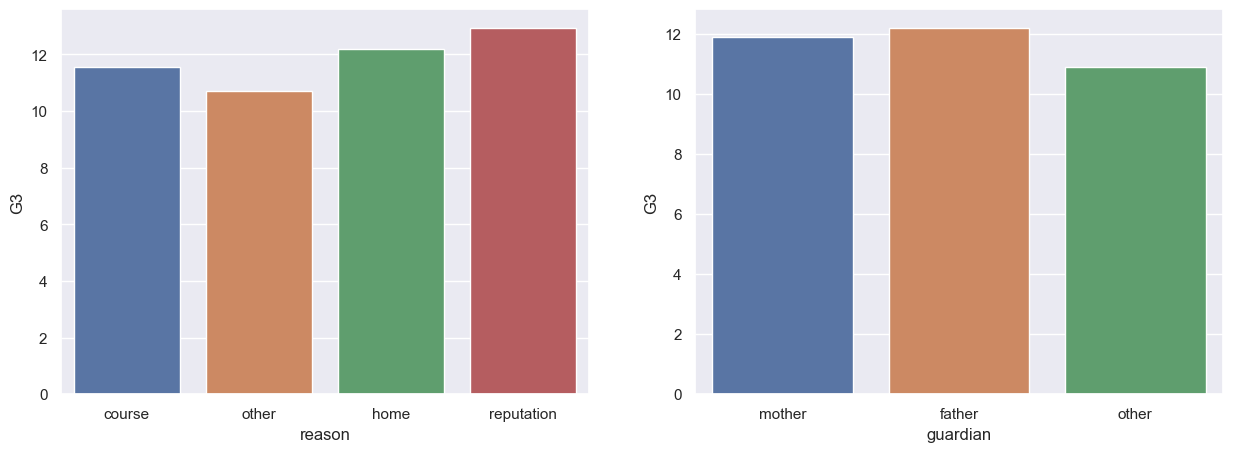

In [78]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

sns.set()
sns.barplot(x = 'reason', y = 'G3', errorbar=None, data = por, ax = ax[0])
sns.barplot(x = 'guardian', y = 'G3', errorbar=None, data = por, ax = ax[1]);

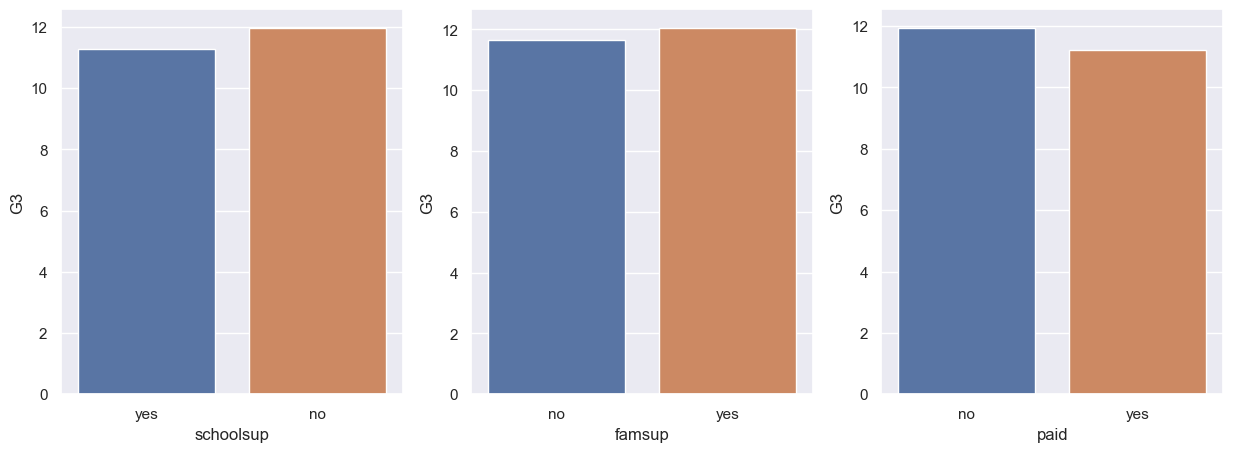

In [79]:
fig, ax = plt.subplots(1,3, figsize = (15,5))

sns.set()
sns.barplot(x = 'schoolsup', y = 'G3', errorbar=None, data = por, ax = ax[0])
sns.barplot(x = 'famsup', y = 'G3', errorbar=None, data = por, ax = ax[1])
sns.barplot(x = 'paid', y = 'G3', errorbar=None, data = por, ax = ax[2]);

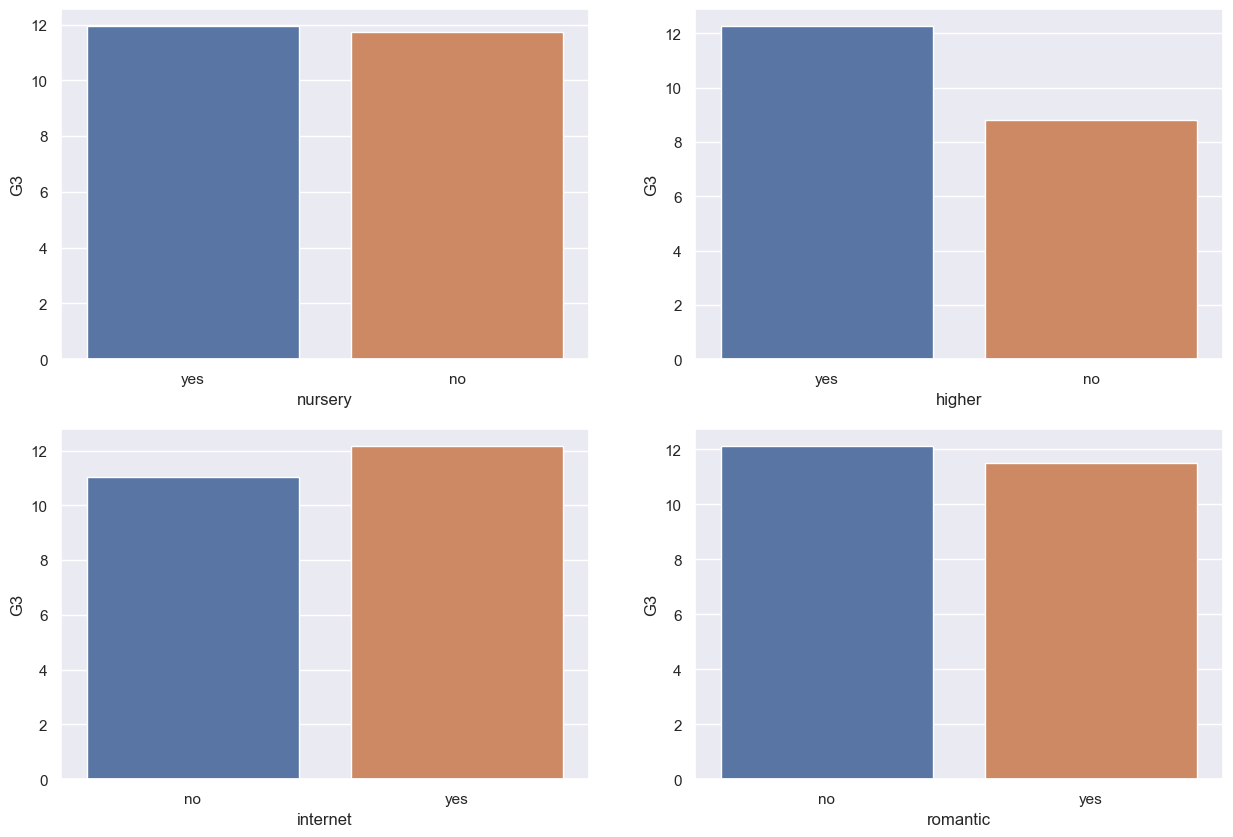

In [80]:
fig, ax = plt.subplots(2,2, figsize = (15,10))

sns.set()
sns.barplot(x = 'nursery', y = 'G3', errorbar=None, data = por, ax = ax[0][0])
sns.barplot(x = 'higher', y = 'G3', errorbar=None, data = por, ax = ax[0][1])
sns.barplot(x = 'internet', y = 'G3', errorbar=None, data = por, ax = ax[1][0])
sns.barplot(x = 'romantic', y = 'G3', errorbar=None, data = por, ax = ax[1][1]);

Students who intend to continue their education at the higher level significantly perform better at portugese than their peers who do not wish to further their education.

In [81]:
# look for correlation

corr_matrix = abs(por.corr(numeric_only = True))
corr_matrix['G3'].sort_values(ascending = False)

G3            1.000000
G2            0.918548
G1            0.826387
failures      0.393316
studytime     0.249789
Medu          0.240151
Fedu          0.211800
Dalc          0.204719
Walc          0.176619
traveltime    0.127173
freetime      0.122705
age           0.106505
health        0.098851
absences      0.091379
goout         0.087641
famrel        0.063361
Name: G3, dtype: float64

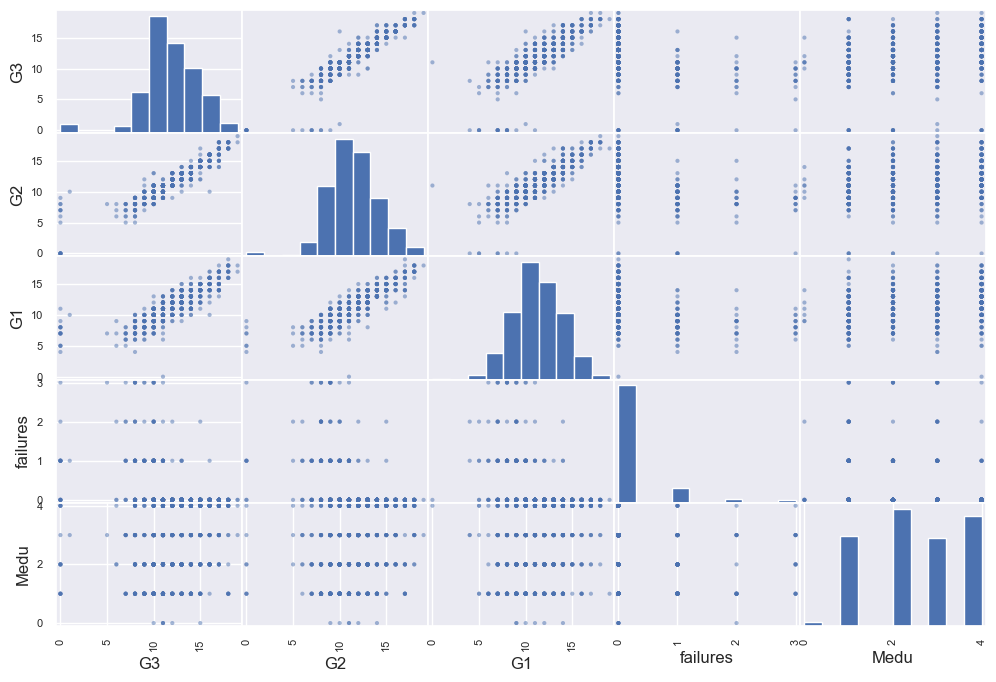

In [82]:
attributes = ['G3', 'G2', 'G1', 'failures', 'Medu']
scatter_matrix(por[attributes], figsize = (12,8))
plt.show();

The 1st period, 2nd period and 3rd final grades are all have a strong positive correlation with each other. Students who perform well in any of these evaluations are likely to perform well in the others as well.

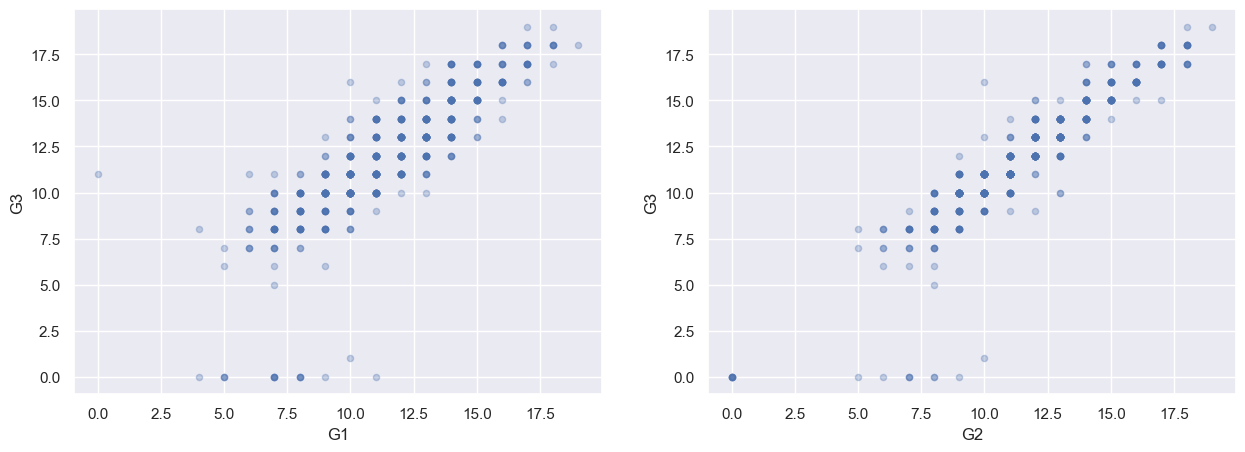

In [83]:
# take a closer look at G1 and G2 scatterplots

fig, axes = plt.subplots(1,2, figsize = (15,5))

por.plot(kind='scatter',x = 'G1', y ='G3', alpha = 0.3, grid = True, ax = axes[0])
por.plot(kind='scatter',x = 'G2', y ='G3', alpha = 0.3, grid = True, ax = axes[1])
plt.show();

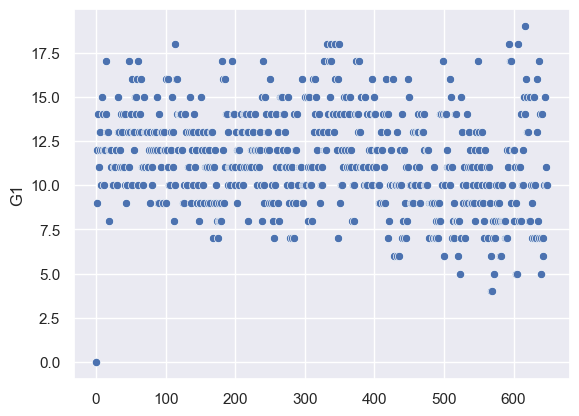

In [84]:
sns.scatterplot(por['G1']);

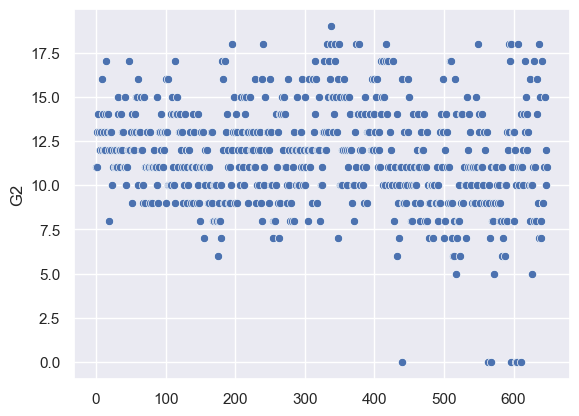

In [85]:
sns.scatterplot(por['G2']);

# Prepare data for ML Algorithm

## Split the data

In [86]:
# split the data into train and test sets

train, test = train_test_split( por, test_size=0.2, shuffle = True, random_state=42)

In [87]:
train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
332,GP,F,18,U,GT3,T,2,2,at_home,at_home,...,4,3,3,1,2,2,0,18,18,18
29,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,4,4,5,5,5,5,4,12,11,12
302,GP,M,18,R,GT3,T,3,2,other,other,...,5,3,2,1,1,3,2,10,11,12
286,GP,M,17,R,GT3,T,2,1,other,other,...,4,4,2,2,4,5,0,12,12,13
554,MS,F,17,R,GT3,T,1,1,at_home,at_home,...,3,5,5,2,2,4,3,10,11,10


In [88]:
train.shape, test.shape

((519, 33), (130, 33))

## Clean the Data

In [89]:
x_train = train.drop('G3', axis = 1)
y_train = train.G3.copy()

In [90]:
x_train.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
dtype: int64

In [91]:
cat_attributes = x_train.select_dtypes('object').columns.tolist()
cat_attributes

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [92]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 519 entries, 332 to 102
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      519 non-null    object
 1   sex         519 non-null    object
 2   age         519 non-null    int64 
 3   address     519 non-null    object
 4   famsize     519 non-null    object
 5   Pstatus     519 non-null    object
 6   Medu        519 non-null    int64 
 7   Fedu        519 non-null    int64 
 8   Mjob        519 non-null    object
 9   Fjob        519 non-null    object
 10  reason      519 non-null    object
 11  guardian    519 non-null    object
 12  traveltime  519 non-null    int64 
 13  studytime   519 non-null    int64 
 14  failures    519 non-null    int64 
 15  schoolsup   519 non-null    object
 16  famsup      519 non-null    object
 17  paid        519 non-null    object
 18  activities  519 non-null    object
 19  nursery     519 non-null    object
 20  higher      5

In [93]:
num_attr_scale = ['age', 'absences', 'G1', 'G2']

scaler = StandardScaler()

## Building Transformation Pipelines

In [94]:
import sklearn
sklearn.set_config(display = 'diagram')

In [95]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

num_pipeline = make_pipeline(SimpleImputer(strategy = 'median'), StandardScaler())
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [96]:
likert_cat_attr = [attr for attr in x_train.select_dtypes('number').columns if attr  not in num_attr_scale]
likert_cat_attr

['Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health']

In [97]:
cat_attributes_imp = [attr for attr in x_train.columns if attr  not in num_attr_scale]

In [98]:
print(f'Categorical features for One-hot encoding: {len(cat_attributes)}\n {cat_attributes}\n Numerical features for scaling: {len(num_attr_scale)}\n {num_attr_scale}\n Categorical Likert features for Simple Imputer: {len(likert_cat_attr)}\n {likert_cat_attr}')

Categorical features for One-hot encoding: 17
 ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
 Numerical features for scaling: 4
 ['age', 'absences', 'G1', 'G2']
 Categorical Likert features for Simple Imputer: 11
 ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']


In [99]:
cat_im_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'))
cat_1h_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))

In [100]:
from sklearn.compose import make_column_transformer

preprocessing = make_column_transformer((num_pipeline, num_attr_scale),
                                        (cat_im_pipeline, likert_cat_attr),
                                        (cat_1h_pipeline, cat_attributes)
                                        )

In [101]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 519 entries, 332 to 102
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      519 non-null    object
 1   sex         519 non-null    object
 2   age         519 non-null    int64 
 3   address     519 non-null    object
 4   famsize     519 non-null    object
 5   Pstatus     519 non-null    object
 6   Medu        519 non-null    int64 
 7   Fedu        519 non-null    int64 
 8   Mjob        519 non-null    object
 9   Fjob        519 non-null    object
 10  reason      519 non-null    object
 11  guardian    519 non-null    object
 12  traveltime  519 non-null    int64 
 13  studytime   519 non-null    int64 
 14  failures    519 non-null    int64 
 15  schoolsup   519 non-null    object
 16  famsup      519 non-null    object
 17  paid        519 non-null    object
 18  activities  519 non-null    object
 19  nursery     519 non-null    object
 20  higher      5

In [102]:
math_prepared = preprocessing.fit_transform(x_train)

In [103]:
math_prepared.shape

(519, 58)

In [104]:
preprocessing.get_feature_names_out()

array(['pipeline-1__age', 'pipeline-1__absences', 'pipeline-1__G1',
       'pipeline-1__G2', 'pipeline-2__Medu', 'pipeline-2__Fedu',
       'pipeline-2__traveltime', 'pipeline-2__studytime',
       'pipeline-2__failures', 'pipeline-2__famrel',
       'pipeline-2__freetime', 'pipeline-2__goout', 'pipeline-2__Dalc',
       'pipeline-2__Walc', 'pipeline-2__health', 'pipeline-3__school_GP',
       'pipeline-3__school_MS', 'pipeline-3__sex_F', 'pipeline-3__sex_M',
       'pipeline-3__address_R', 'pipeline-3__address_U',
       'pipeline-3__famsize_GT3', 'pipeline-3__famsize_LE3',
       'pipeline-3__Pstatus_A', 'pipeline-3__Pstatus_T',
       'pipeline-3__Mjob_at_home', 'pipeline-3__Mjob_health',
       'pipeline-3__Mjob_other', 'pipeline-3__Mjob_services',
       'pipeline-3__Mjob_teacher', 'pipeline-3__Fjob_at_home',
       'pipeline-3__Fjob_health', 'pipeline-3__Fjob_other',
       'pipeline-3__Fjob_services', 'pipeline-3__Fjob_teacher',
       'pipeline-3__reason_course', 'pipeline-3__r

In [105]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import Pipeline

forest_reg = Pipeline([
 ("preprocessing", preprocessing),
 ("randomforestregressor", RandomForestRegressor(random_state=42)),])

forest_reg.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'absences', 'G1',
                                                   'G2']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Medu', 'Fedu', 'traveltime',
                                                   'studytime', 'failu...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Mjob',
                                                   'Fjob', 'reason', 'guardian',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

## Run model on test set

In [106]:
x_test = test.drop('G3', axis = 1)
y_test = test.G3.copy()

In [107]:
forest_rmses = -cross_val_score(final_model, x_test, y_test, scoring = 'neg_root_mean_squared_error', cv = 10)

pd.Series(forest_rmses).describe()

count    10.000000
mean      1.297994
std       0.757339
min       0.779299
25%       0.820135
50%       0.905229
75%       1.371926
max       2.757723
dtype: float64

In [108]:
predictions = forest_reg.predict(x_train)
from sklearn.metrics import mean_squared_error

forest_rmse = mean_squared_error(y_train, predictions, squared = False)

forest_rmse

0.48850643357633694

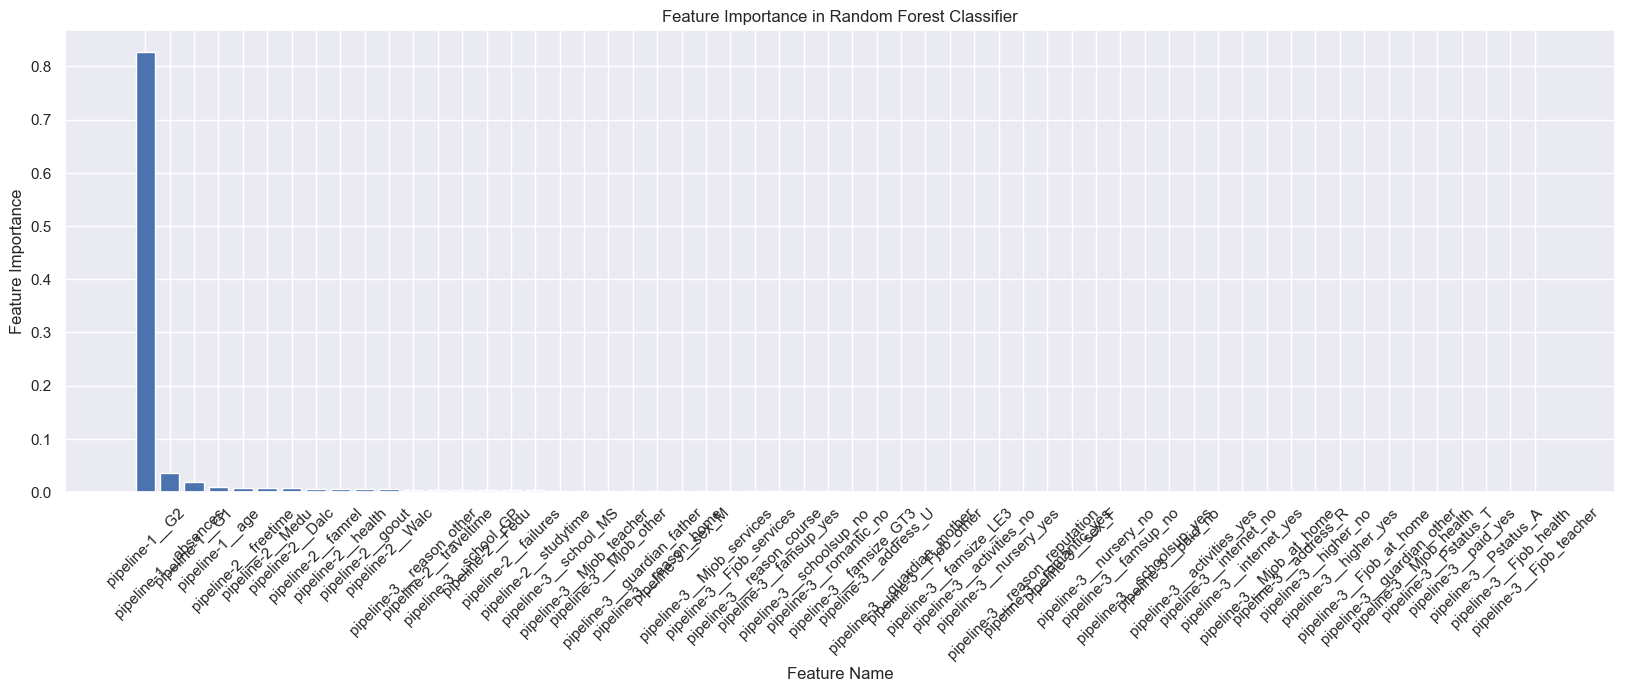

In [109]:
feature_importances = forest_reg.named_steps['randomforestregressor'].feature_importances_

plt.figure(figsize=(20,6))
# Sort features by importance
sorted_features = sorted(zip(feature_importances, forest_reg['preprocessing'].get_feature_names_out()), reverse = True)

# Extract feature names and importance values
feature_names = [x[1] for x in sorted_features]
importance_values = [x[0] for x in sorted_features]

# Create a bar chart to visualize feature importance
plt.bar(feature_names, importance_values)
plt.xticks(rotation = 45)
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show();

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state = 42))

forest_rmses = -cross_val_score(forest_reg, x_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 10)

In [111]:
pd.Series(forest_rmses).describe()

count    10.000000
mean      1.253796
std       0.397003
min       0.714199
25%       0.986592
50%       1.178600
75%       1.372009
max       1.961112
dtype: float64

In [112]:
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([
 ("preprocessing", preprocessing),
 ("random_forest", RandomForestRegressor(random_state=42)),])

In [113]:
# Get an optimized model using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {'random_forest__max_features': randint(low =2, high = 55)}
    
rnd_search = RandomizedSearchCV(full_pipeline, param_distributions = param_distribs, n_iter = 10, cv = 5, scoring = 'neg_root_mean_squared_error', random_state = 42)

rnd_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'absences',
                                                                                'G1',
                                                                                'G2']),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='most_frequent'))]),
                                                                               ['Medu',
                                                                                'Fed...
                                                                                'reason',
                                                                                'guardian',
                                                                                'schoolsup',
                                                                                'famsup',
                                                                                'paid',
                                                                                'activities',
                                                                                'nursery',
                                                                                'higher',
                                                                                'internet',
                                                                                'romantic'])])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001766ECCACD0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [114]:
final_model = rnd_search.best_estimator_
feature_importances = final_model['random_forest'].feature_importances_

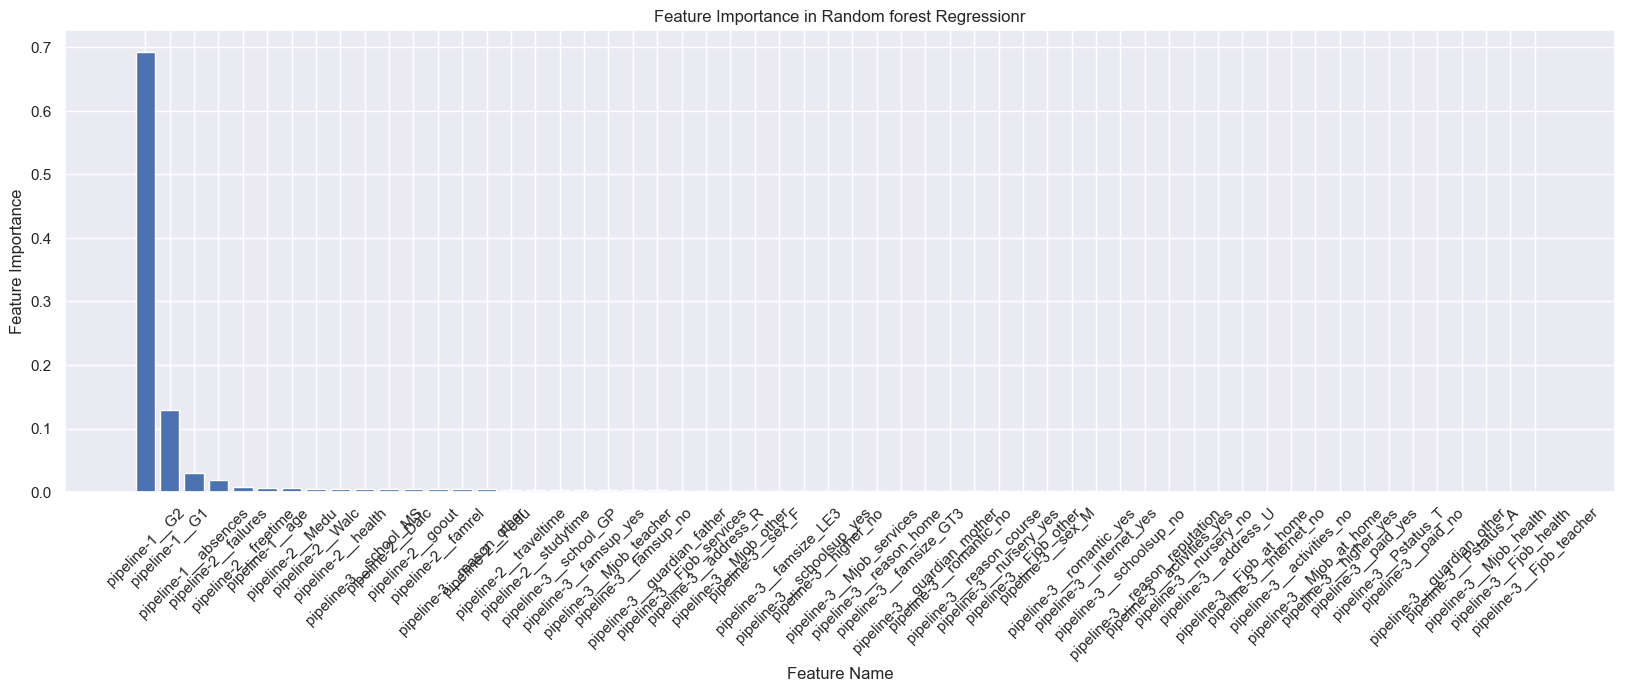

In [116]:
plt.figure(figsize=(20,6))
# Sort features by importance
sorted_features = sorted(zip(feature_importances, final_model['preprocessing'].get_feature_names_out()), reverse = True)

# Extract feature names and importance values
feature_names = [x[1] for x in sorted_features]
importance_values = [x[0] for x in sorted_features]

# Create a bar chart to visualize feature importance
plt.bar(feature_names, importance_values)
plt.xticks(rotation = 45)
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Random forest Regressionr')
plt.show();

In [117]:
predictions = final_model.predict(x_train)

forest_rmse = mean_squared_error(y_train, predictions, squared = False)

forest_rmse

0.4875118693283588

In [118]:
forest_rmses = -cross_val_score(final_model, x_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 10)

In [119]:
pd.Series(forest_rmses).describe()

count    10.000000
mean      1.218556
std       0.374001
min       0.716324
25%       0.978198
50%       1.102242
75%       1.393109
max       1.846258
dtype: float64

## Feature Selection

In [120]:
top_features = [feature for importance, feature in sorted_features if importance > 0.005]

top_features

['pipeline-1__G2',
 'pipeline-1__G1',
 'pipeline-1__absences',
 'pipeline-2__failures',
 'pipeline-2__freetime',
 'pipeline-1__age',
 'pipeline-2__Medu',
 'pipeline-2__Walc',
 'pipeline-2__health',
 'pipeline-3__school_MS',
 'pipeline-2__Dalc',
 'pipeline-2__goout',
 'pipeline-2__famrel']

## Run model on test set

In [121]:
x_test = test.drop('G3', axis = 1)
y_test = test.G3.copy()

In [122]:
forest_rmses = -cross_val_score(final_model, x_test, y_test, scoring = 'neg_root_mean_squared_error', cv = 10)

pd.Series(forest_rmses).describe()

count    10.000000
mean      1.297994
std       0.757339
min       0.779299
25%       0.820135
50%       0.905229
75%       1.371926
max       2.757723
dtype: float64

# Classification Task

## Explore the data

In [152]:
# load the data

mat = pd.read_csv('data\student-mat.csv', sep = ';')
mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [124]:
def convert_grade(grade):
    if grade < 7:
        return 'Poor'
    elif grade < 14:
        return 'Average'
    else:
        return 'Good'

In [125]:
mat['Cat'] = mat['G3'].apply(lambda x: convert_grade(x))
mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Cat
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Average
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Good
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Average


In [126]:
mat.drop('G3', axis = 1, inplace =True)
mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Cat
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,Poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,Poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,Average
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,Good
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,Average


## Split the data

In [127]:
# split the data into train and test sets

train, test = train_test_split( mat, test_size=0.2, shuffle = True, random_state=42)

In [128]:
train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Cat
181,GP,M,16,U,GT3,T,3,3,services,other,...,4,2,3,1,2,3,2,12,13,Average
194,GP,M,16,U,GT3,T,2,3,other,other,...,5,3,3,1,1,3,0,13,14,Good
173,GP,F,16,U,GT3,T,1,3,at_home,services,...,4,3,5,1,1,3,0,8,7,Poor
63,GP,F,16,U,GT3,T,4,3,teacher,health,...,3,4,4,2,4,4,2,10,9,Average
253,GP,M,16,R,GT3,T,2,1,other,other,...,3,3,2,1,3,3,0,8,9,Average


In [129]:
train.shape, test.shape

((316, 33), (79, 33))

## Clean the Data

In [130]:
x_train = train.drop('Cat', axis = 1)
y_train = train.Cat.copy()

In [131]:
x_train.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
dtype: int64

In [132]:
cat_attributes = x_train.select_dtypes('object').columns.tolist()
cat_attributes

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [133]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316 entries, 181 to 102
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      316 non-null    object
 1   sex         316 non-null    object
 2   age         316 non-null    int64 
 3   address     316 non-null    object
 4   famsize     316 non-null    object
 5   Pstatus     316 non-null    object
 6   Medu        316 non-null    int64 
 7   Fedu        316 non-null    int64 
 8   Mjob        316 non-null    object
 9   Fjob        316 non-null    object
 10  reason      316 non-null    object
 11  guardian    316 non-null    object
 12  traveltime  316 non-null    int64 
 13  studytime   316 non-null    int64 
 14  failures    316 non-null    int64 
 15  schoolsup   316 non-null    object
 16  famsup      316 non-null    object
 17  paid        316 non-null    object
 18  activities  316 non-null    object
 19  nursery     316 non-null    object
 20  higher      3

In [134]:
num_attr_scale = ['age', 'absences', 'G1', 'G2']

## Building Transformation Pipelines

In [135]:
scaler = StandardScaler()
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

num_pipeline = make_pipeline(SimpleImputer(strategy = 'median'), StandardScaler())
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [136]:
likert_cat_attr = [attr for attr in x_train.select_dtypes('number').columns if attr  not in num_attr_scale]
likert_cat_attr

['Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health']

In [137]:
cat_attributes_imp = [attr for attr in x_train.columns if attr  not in num_attr_scale]

In [138]:
print(f'Categorical features for One-hot encoding: {len(cat_attributes)}\n {cat_attributes}\n Numerical features for scaling: {len(num_attr_scale)}\n {num_attr_scale}\n Categorical Likert features for Simple Imputer: {len(likert_cat_attr)}\n {likert_cat_attr}')

Categorical features for One-hot encoding: 17
 ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
 Numerical features for scaling: 4
 ['age', 'absences', 'G1', 'G2']
 Categorical Likert features for Simple Imputer: 11
 ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']


In [139]:
cat_im_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'))
cat_1h_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))

In [140]:
from sklearn.compose import make_column_transformer

preprocessing = make_column_transformer((num_pipeline, num_attr_scale),
                                        (cat_im_pipeline, likert_cat_attr),
                                        (cat_1h_pipeline, cat_attributes)
                                        )

In [141]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316 entries, 181 to 102
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      316 non-null    object
 1   sex         316 non-null    object
 2   age         316 non-null    int64 
 3   address     316 non-null    object
 4   famsize     316 non-null    object
 5   Pstatus     316 non-null    object
 6   Medu        316 non-null    int64 
 7   Fedu        316 non-null    int64 
 8   Mjob        316 non-null    object
 9   Fjob        316 non-null    object
 10  reason      316 non-null    object
 11  guardian    316 non-null    object
 12  traveltime  316 non-null    int64 
 13  studytime   316 non-null    int64 
 14  failures    316 non-null    int64 
 15  schoolsup   316 non-null    object
 16  famsup      316 non-null    object
 17  paid        316 non-null    object
 18  activities  316 non-null    object
 19  nursery     316 non-null    object
 20  higher      3

In [142]:
math_prepared = preprocessing.fit_transform(x_train)

In [143]:
math_prepared.shape

(316, 58)

In [144]:
preprocessing.get_feature_names_out()

array(['pipeline-1__age', 'pipeline-1__absences', 'pipeline-1__G1',
       'pipeline-1__G2', 'pipeline-2__Medu', 'pipeline-2__Fedu',
       'pipeline-2__traveltime', 'pipeline-2__studytime',
       'pipeline-2__failures', 'pipeline-2__famrel',
       'pipeline-2__freetime', 'pipeline-2__goout', 'pipeline-2__Dalc',
       'pipeline-2__Walc', 'pipeline-2__health', 'pipeline-3__school_GP',
       'pipeline-3__school_MS', 'pipeline-3__sex_F', 'pipeline-3__sex_M',
       'pipeline-3__address_R', 'pipeline-3__address_U',
       'pipeline-3__famsize_GT3', 'pipeline-3__famsize_LE3',
       'pipeline-3__Pstatus_A', 'pipeline-3__Pstatus_T',
       'pipeline-3__Mjob_at_home', 'pipeline-3__Mjob_health',
       'pipeline-3__Mjob_other', 'pipeline-3__Mjob_services',
       'pipeline-3__Mjob_teacher', 'pipeline-3__Fjob_at_home',
       'pipeline-3__Fjob_health', 'pipeline-3__Fjob_other',
       'pipeline-3__Fjob_services', 'pipeline-3__Fjob_teacher',
       'pipeline-3__reason_course', 'pipeline-3__r

#### RandomForest Classifier is used because it uses a combination of decision trees which reduces overfitting and provides high precision

In [145]:
from sklearn.pipeline import Pipeline

forest_class = Pipeline([
 ("preprocessing", preprocessing),
 ("randomforestclassifier", RandomForestClassifier(random_state=42)),])

forest_class.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'absences', 'G1',
                                                   'G2']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Medu', 'Fedu', 'traveltime',
                                                   'studytime', 'failu...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Mjob',
                                                   'Fjob', 'reason', 'guardian',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

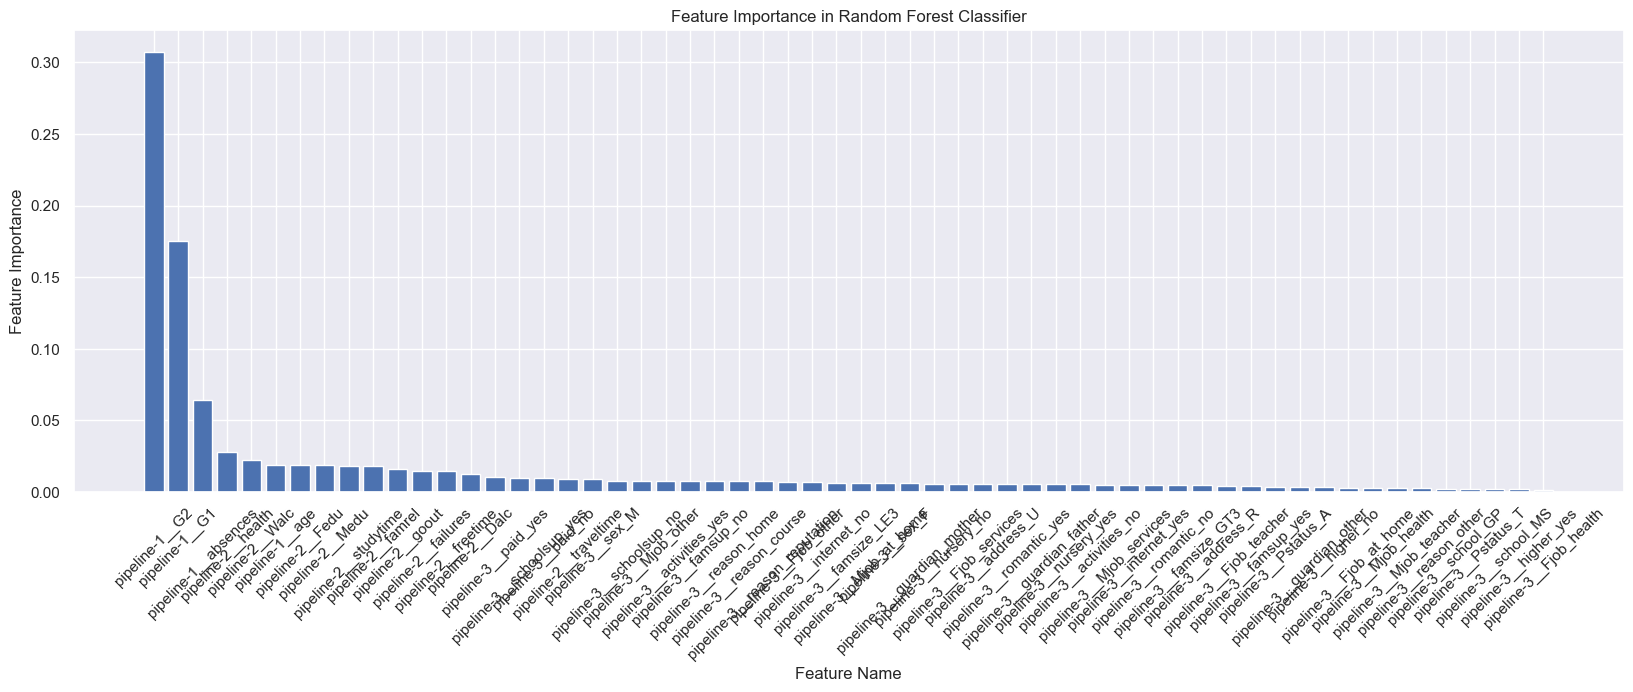

In [146]:
feature_importances = forest_class.named_steps['randomforestclassifier'].feature_importances_

plt.figure(figsize=(20,6))
# Sort features by importance
sorted_features = sorted(zip(feature_importances, forest_class['preprocessing'].get_feature_names_out()), reverse = True)

# Extract feature names and importance values
feature_names = [x[1] for x in sorted_features]
importance_values = [x[0] for x in sorted_features]

# Create a bar chart to visualize feature importance
plt.bar(feature_names, importance_values)
plt.xticks(rotation = 45)
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show();

In [147]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {'randomforestclassifier__max_features': randint(low =2, high = 55)}
    
rnd_search = RandomizedSearchCV(forest_class, param_distributions = param_distribs, n_iter = 10, cv = 5, scoring = 'f1', random_state = 42)

rnd_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'absences',
                                                                                'G1',
                                                                                'G2']),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='most_frequent'))]),
                                                                               ['Medu',
                                                                                'Fed...
                                                                                'Fjob',
                                                                                'reason',
                                                                                'guardian',
                                                                                'schoolsup',
                                                                                'famsup',
                                                                                'paid',
                                                                                'activities',
                                                                                'nursery',
                                                                                'higher',
                                                                                'internet',
                                                                                'romantic'])])),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'randomforestclassifier__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001766F864F10>},
                   random_state=42, scoring='f1')

In [148]:
final_model = rnd_search.best_estimator_
feature_importances = final_model['randomforestclassifier'].feature_importances_

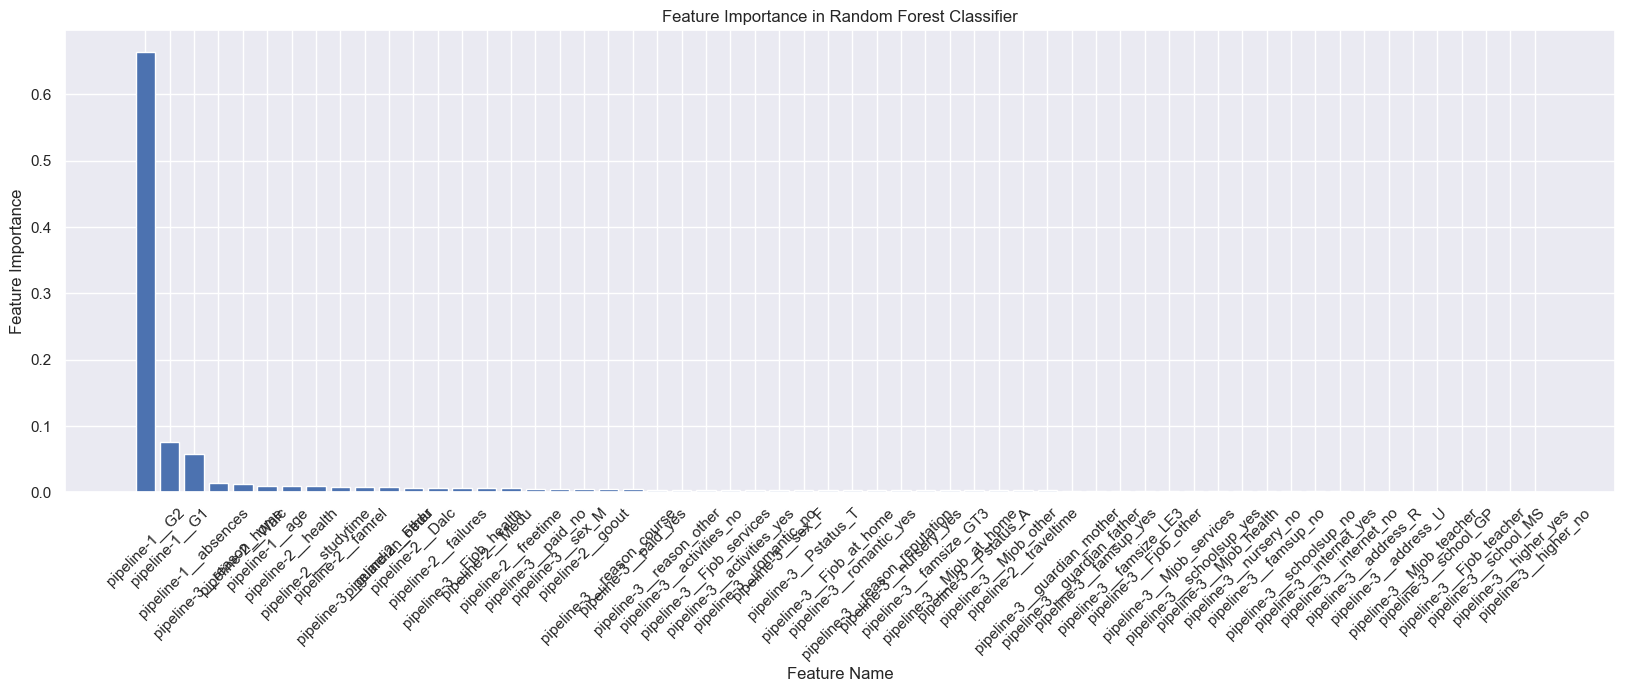

In [149]:
plt.figure(figsize=(20,6))
# Sort features by importance
sorted_features = sorted(zip(feature_importances, final_model['preprocessing'].get_feature_names_out()), reverse = True)

# Extract feature names and importance values
feature_names = [x[1] for x in sorted_features]
importance_values = [x[0] for x in sorted_features]

# Create a bar chart to visualize feature importance
plt.bar(feature_names, importance_values)
plt.xticks(rotation = 45)
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show();

## Run model on test set

In [150]:
x_test = test.drop('Cat', axis = 1)
y_test = test.Cat.copy()

In [151]:
predictions = final_model.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
cm

Accuracy: 0.85
              precision    recall  f1-score   support

     Average       0.80      0.92      0.85        38
        Good       0.96      0.85      0.90        26
        Poor       0.83      0.67      0.74        15

    accuracy                           0.85        79
   macro avg       0.86      0.81      0.83        79
weighted avg       0.86      0.85      0.85        79



array([[35,  1,  2],
       [ 4, 22,  0],
       [ 5,  0, 10]], dtype=int64)

The F1 score for average is 0.85, good is 0.90 and poor is 0.74.

35 instances were correctly predicted as average while 1 instance was incorrectly predicted as good and 2 instances were incorrectly predicted as poor.
22 instances were correctly predicted as good while 4 instances were incorrectly predicted as average.
10 instances were correctly predicted as poor while 5 instances were incorrectly predicted as average.


## Classification Problem for Portugese Dataset

## Explore the data

In [153]:
# load the data

por = pd.read_csv('data\student-por.csv', sep = ';')
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [154]:
def convert_grade(grade):
    if grade < 7:
        return 'Poor'
    elif grade < 14:
        return 'Average'
    else:
        return 'Good'

In [155]:
por['Cat'] = por['G3'].apply(lambda x: convert_grade(x))
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Cat
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,Average
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,Average
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,Average
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,Good
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,Average


In [156]:
por.drop('G3', axis = 1, inplace =True)
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Cat
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,Average
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,Average
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,Average
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,Good
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,Average


## Split the data

In [157]:
# split the data into train and test sets

train, test = train_test_split( por, test_size=0.2, shuffle = True, random_state=42)

In [158]:
train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Cat
332,GP,F,18,U,GT3,T,2,2,at_home,at_home,...,4,3,3,1,2,2,0,18,18,Good
29,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,4,4,5,5,5,5,4,12,11,Average
302,GP,M,18,R,GT3,T,3,2,other,other,...,5,3,2,1,1,3,2,10,11,Average
286,GP,M,17,R,GT3,T,2,1,other,other,...,4,4,2,2,4,5,0,12,12,Average
554,MS,F,17,R,GT3,T,1,1,at_home,at_home,...,3,5,5,2,2,4,3,10,11,Average


In [159]:
train.shape, test.shape

((519, 33), (130, 33))

## Clean the Data

In [160]:
x_train = train.drop('Cat', axis = 1)
y_train = train.Cat.copy()

In [161]:
x_train.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
dtype: int64

In [162]:
cat_attributes = x_train.select_dtypes('object').columns.tolist()
cat_attributes

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [164]:
num_attr_scale = ['age', 'absences', 'G1', 'G2']

## Building Transformation Pipelines

In [165]:
scaler = StandardScaler()
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

num_pipeline = make_pipeline(SimpleImputer(strategy = 'median'), StandardScaler())
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [166]:
likert_cat_attr = [attr for attr in x_train.select_dtypes('number').columns if attr  not in num_attr_scale]
likert_cat_attr

['Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health']

In [167]:
cat_attributes_imp = [attr for attr in x_train.columns if attr  not in num_attr_scale]

In [168]:
print(f'Categorical features for One-hot encoding: {len(cat_attributes)}\n {cat_attributes}\n Numerical features for scaling: {len(num_attr_scale)}\n {num_attr_scale}\n Categorical Likert features for Simple Imputer: {len(likert_cat_attr)}\n {likert_cat_attr}')

Categorical features for One-hot encoding: 17
 ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
 Numerical features for scaling: 4
 ['age', 'absences', 'G1', 'G2']
 Categorical Likert features for Simple Imputer: 11
 ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']


In [169]:
cat_im_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'))
cat_1h_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))

In [170]:
from sklearn.compose import make_column_transformer

preprocessing = make_column_transformer((num_pipeline, num_attr_scale),
                                        (cat_im_pipeline, likert_cat_attr),
                                        (cat_1h_pipeline, cat_attributes)
                                        )

In [172]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 519 entries, 332 to 102
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      519 non-null    object
 1   sex         519 non-null    object
 2   age         519 non-null    int64 
 3   address     519 non-null    object
 4   famsize     519 non-null    object
 5   Pstatus     519 non-null    object
 6   Medu        519 non-null    int64 
 7   Fedu        519 non-null    int64 
 8   Mjob        519 non-null    object
 9   Fjob        519 non-null    object
 10  reason      519 non-null    object
 11  guardian    519 non-null    object
 12  traveltime  519 non-null    int64 
 13  studytime   519 non-null    int64 
 14  failures    519 non-null    int64 
 15  schoolsup   519 non-null    object
 16  famsup      519 non-null    object
 17  paid        519 non-null    object
 18  activities  519 non-null    object
 19  nursery     519 non-null    object
 20  higher      5

In [173]:
math_prepared = preprocessing.fit_transform(x_train)

In [174]:
math_prepared.shape

(519, 58)

In [175]:
preprocessing.get_feature_names_out()

array(['pipeline-1__age', 'pipeline-1__absences', 'pipeline-1__G1',
       'pipeline-1__G2', 'pipeline-2__Medu', 'pipeline-2__Fedu',
       'pipeline-2__traveltime', 'pipeline-2__studytime',
       'pipeline-2__failures', 'pipeline-2__famrel',
       'pipeline-2__freetime', 'pipeline-2__goout', 'pipeline-2__Dalc',
       'pipeline-2__Walc', 'pipeline-2__health', 'pipeline-3__school_GP',
       'pipeline-3__school_MS', 'pipeline-3__sex_F', 'pipeline-3__sex_M',
       'pipeline-3__address_R', 'pipeline-3__address_U',
       'pipeline-3__famsize_GT3', 'pipeline-3__famsize_LE3',
       'pipeline-3__Pstatus_A', 'pipeline-3__Pstatus_T',
       'pipeline-3__Mjob_at_home', 'pipeline-3__Mjob_health',
       'pipeline-3__Mjob_other', 'pipeline-3__Mjob_services',
       'pipeline-3__Mjob_teacher', 'pipeline-3__Fjob_at_home',
       'pipeline-3__Fjob_health', 'pipeline-3__Fjob_other',
       'pipeline-3__Fjob_services', 'pipeline-3__Fjob_teacher',
       'pipeline-3__reason_course', 'pipeline-3__r

In [176]:
from sklearn.pipeline import Pipeline

forest_class = Pipeline([
 ("preprocessing", preprocessing),
 ("randomforestclassifier", RandomForestClassifier(random_state=42)),])

forest_class.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'absences', 'G1',
                                                   'G2']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Medu', 'Fedu', 'traveltime',
                                                   'studytime', 'failu...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Mjob',
                                                   'Fjob', 'reason', 'guardian',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

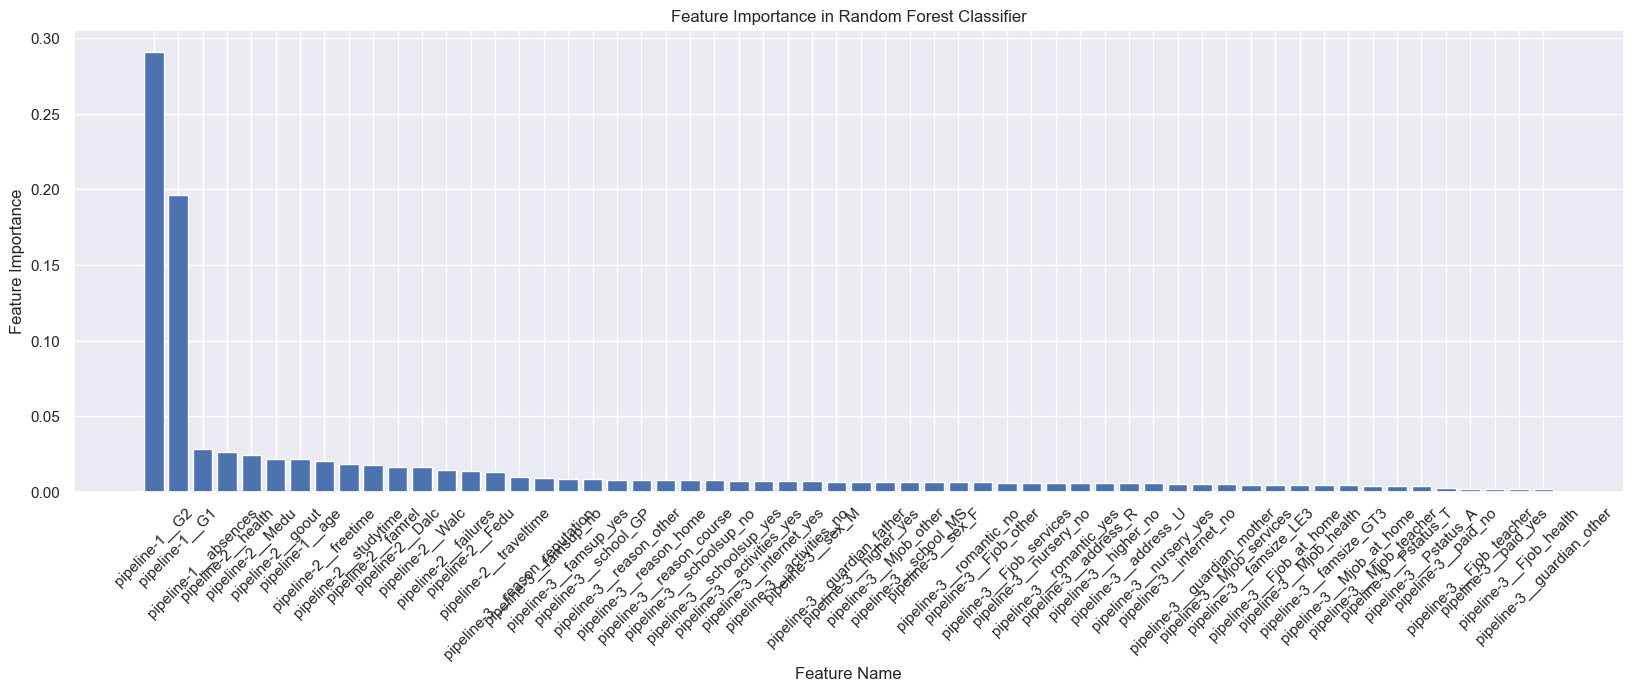

In [177]:
feature_importances = forest_class.named_steps['randomforestclassifier'].feature_importances_

plt.figure(figsize=(20,6))
# Sort features by importance
sorted_features = sorted(zip(feature_importances, forest_class['preprocessing'].get_feature_names_out()), reverse = True)

# Extract feature names and importance values
feature_names = [x[1] for x in sorted_features]
importance_values = [x[0] for x in sorted_features]

# Create a bar chart to visualize feature importance
plt.bar(feature_names, importance_values)
plt.xticks(rotation = 45)
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show();

In [178]:
# Get an optimized model using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {'randomforestclassifier__max_features': randint(low =2, high = 55)}
    
rnd_search = RandomizedSearchCV(forest_class, param_distributions = param_distribs, n_iter = 10, cv = 5, scoring = 'f1', random_state = 42)

rnd_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'absences',
                                                                                'G1',
                                                                                'G2']),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='most_frequent'))]),
                                                                               ['Medu',
                                                                                'Fed...
                                                                                'Fjob',
                                                                                'reason',
                                                                                'guardian',
                                                                                'schoolsup',
                                                                                'famsup',
                                                                                'paid',
                                                                                'activities',
                                                                                'nursery',
                                                                                'higher',
                                                                                'internet',
                                                                                'romantic'])])),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'randomforestclassifier__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001766F58F590>},
                   random_state=42, scoring='f1')

In [179]:
final_model = rnd_search.best_estimator_
feature_importances = final_model['randomforestclassifier'].feature_importances_

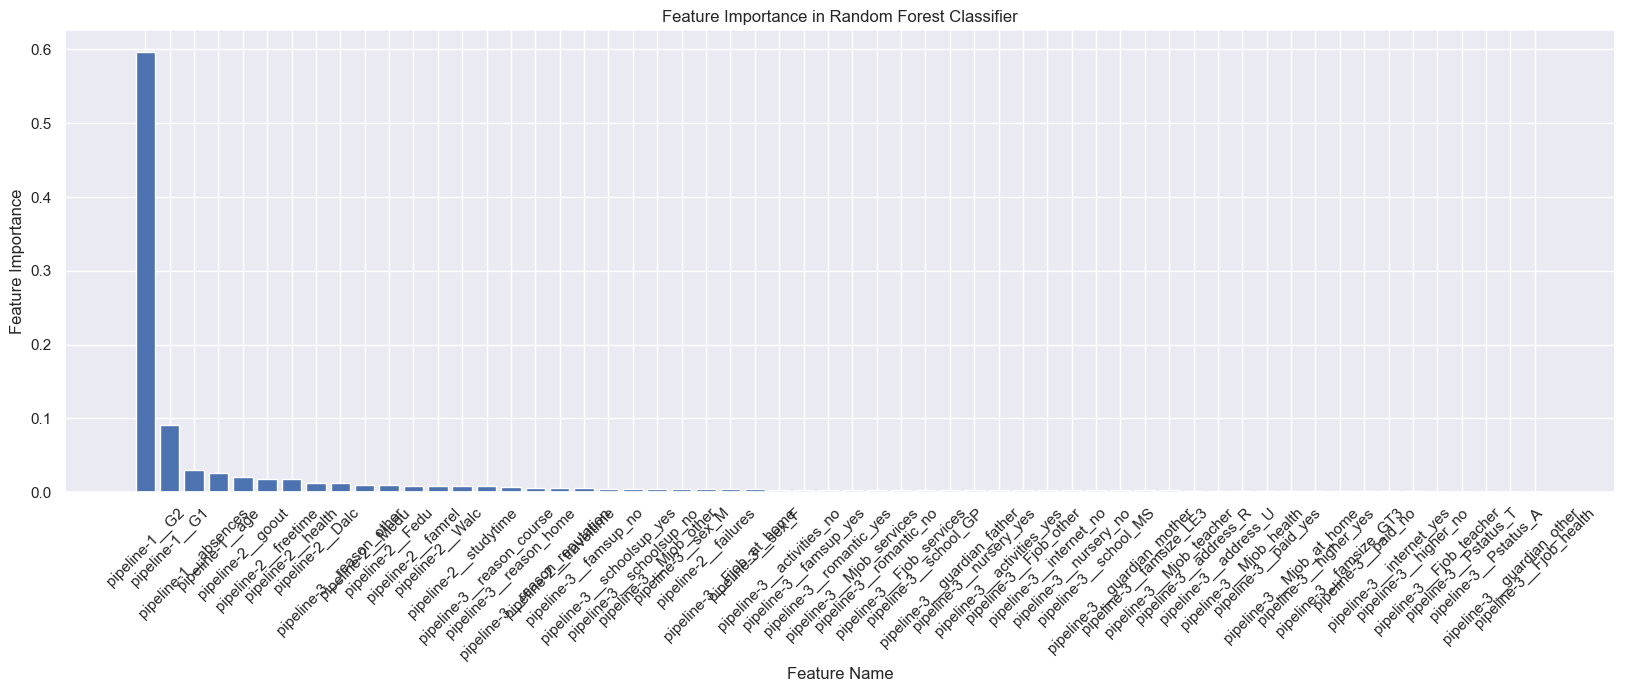

In [180]:
plt.figure(figsize=(20,6))
# Sort features by importance
sorted_features = sorted(zip(feature_importances, final_model['preprocessing'].get_feature_names_out()), reverse = True)

# Extract feature names and importance values
feature_names = [x[1] for x in sorted_features]
importance_values = [x[0] for x in sorted_features]

# Create a bar chart to visualize feature importance
plt.bar(feature_names, importance_values)
plt.xticks(rotation = 45)
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show();

## Run model on test set

In [181]:
x_test = test.drop('Cat', axis = 1)
y_test = test.Cat.copy()

In [182]:
predictions = final_model.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
cm

Accuracy: 0.88
              precision    recall  f1-score   support

     Average       0.90      0.93      0.91        84
        Good       0.86      0.82      0.84        44
        Poor       1.00      0.50      0.67         2

    accuracy                           0.88       130
   macro avg       0.92      0.75      0.81       130
weighted avg       0.88      0.88      0.88       130



array([[78,  6,  0],
       [ 8, 36,  0],
       [ 1,  0,  1]], dtype=int64)

The F1 score for average is 0.91, good is 0.84 and poor is 0.67.

78 instances were correctly predicted as average while 6 instances were incorrectly predicted as good.
36 instances were correctly predicted as good while 8 instances were incorrectly predicted as average.
1 instance was correctly predicted as poor while 1 instance was incorrectly predicted as average.
